# House Price Prediction

**Import libraries that will be used.**

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',3000)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Load the train and test datasets and read the first five rows of the train set to ensure the dataset has been properly loaded.**

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Information is collected based on the train dataset.**
* _**There are 81 columns.**_
* _**There are 1460 rows in the train set.**_
* _**There are null values in some columns.**_
* _**Column "MSSubClass" has the incorrect data type.**_

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

**The "Id" column in the test set is saved as a separate dataframe.**<br>
**The "Id" column is then dropped in both the train and test dataframe.**

In [4]:
test_id = test[['Id']]
train.drop('Id',axis = 1,inplace = True)
test.drop('Id',axis = 1,inplace = True)

## EDA - Exploratory Data Analysis

**There are a few conclusions drawn from analyzing the target column "Sale Price."**
* _**The minimum value is 34,900 and the maximum value is 755,000.**_
* _**The mean and median varies.**_
* _**The distribution is skewed to the right.**_

In [5]:
train.describe()['SalePrice']

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

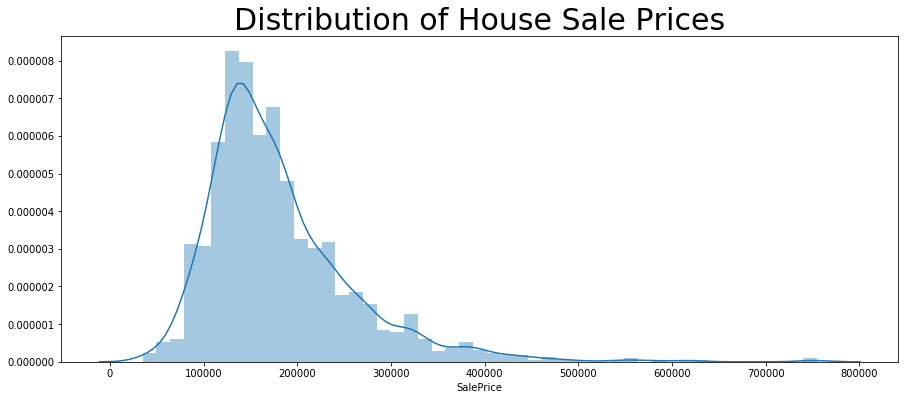

In [6]:
fig,ax = plt.subplots(figsize = (15,6))

sns.distplot(train.SalePrice, ax = ax)
ax.set_title('Distribution of House Sale Prices', fontsize = 30)

fig.show()

In [7]:
#CLT is an abbreviation for Central Limit Theorem
def CLT_matrix(series,col_name):
    CLT_list = []
    
    skew_val = series.skew()
    CLT_list.append(skew_val)
    kurtosis_val = series.kurtosis()
    CLT_list.append(kurtosis_val)
    mean_val = series.mean()
    CLT_list.append(mean_val)
    median_val = series.median()
    CLT_list.append(median_val)
    
    CLT_df = pd.DataFrame(CLT_list,index = ['skew','kurtosis','mean','median'],columns = [col_name])
    return CLT_df
    

In [8]:
CLT_matrix(train['SalePrice'],'SalePrice')

,SalePrice
skew,1.882876
kurtosis,6.536282
mean,180921.195890
median,163000.000000


**Lists for each type of data are assigned.**
* _**A dictionary is created for ordinal columns in order to perserve the importance of order.**_  
  
_**Note: Separating columns into nomial,ordinal, discrete, continuous, and time-related lists is imperative in analyzing each column correctly.**_

In [9]:
nomial_list = ['MSSubClass',
               'MSZoning',
               'Street',
               'Alley',
               'LotShape',
               'LandContour',
               'Utilities',
               'LotConfig',
               'LandSlope',
               'Neighborhood',
               'Condition1',
               'Condition2',
               'BldgType',
               'HouseStyle',
               'RoofStyle',
               'RoofMatl',
               'Exterior1st',
               'Exterior2nd',
               'MasVnrType',
               'Foundation',
               'Heating',
               'CentralAir',
               'Electrical',
               'GarageType',
               'GarageFinish',
               'PavedDrive',
               'Fence',
               'MiscFeature',
               'SaleType',
               'SaleCondition']

print('The number of nomial variable columns are {}.'.format(len(nomial_list)))

The number of nomial variable columns are 30.


In [10]:
ordinal_list = ['OverallQual',
                'OverallCond',
                'ExterQual',
                'ExterCond',
                'BsmtQual',
                'BsmtCond',
                'BsmtExposure',
                'BsmtFinType1',
                'BsmtFinType2',
                'HeatingQC',
                'KitchenQual',
                'Functional',
                'FireplaceQu',
                'GarageQual',
                'GarageCond',
                'PoolQC']
                
print('The number of ordinal variable columns are {}.'.format(len(ordinal_list)))

The number of ordinal variable columns are 16.


In [11]:
ordinal_dict = {'OverallQual' : [1,2,3,4,5,6,7,8,9,10],
              'OverallCond' : [1,2,3,4,5,6,7,8,9],
              'ExterQual' : ['Fa','TA','Gd','Ex'],
             'ExterCond' : ['Po','Fa','TA','Gd','Ex'],
             'BsmtQual' : ['Fa','TA','Gd','Ex'],
             'BsmtCond' : ['Po','Fa','TA','Gd'],
             'BsmtExposure' : ['No','Mn','Av','Gd'],
             'BsmtFinType1' : ['Unf','LwQ','BLQ','Rec','ALQ','GLQ'],
             'BsmtFinType2' : ['Unf','LwQ','BLQ','Rec','ALQ','GLQ'],
             'HeatingQC' : ['Po','Fa','TA','Gd','Ex'],
             'KitchenQual' : ['Fa','TA','Gd','Ex'],
             'Functional' : ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
             'FireplaceQu' : ['Po','Fa','TA','Gd','Ex'],
             'GarageQual' : ['Po','Fa','TA','Gd','Ex'],
             'GarageCond' : ['Po','Fa','TA','Gd','Ex'],
             'PoolQC' : ['Fa','Gd','Ex']}

In [12]:
disc_num_list = ['BsmtFullBath',
                 'BsmtHalfBath',
                 'FullBath',
                 'HalfBath',
                 'BedroomAbvGr',
                 'KitchenAbvGr',
                 'TotRmsAbvGrd',
                 'Fireplaces',
                 'GarageCars']

print('The number of discrete variable columns are {}.'.format(len(disc_num_list)))

The number of discrete variable columns are 9.


In [13]:
cont_num_list = ['LotFrontage',
                 'LotArea',
                 'MasVnrArea',
                 'BsmtFinSF1',
                 'BsmtFinSF2',
                 'BsmtUnfSF',
                 'TotalBsmtSF',
                 '1stFlrSF',
                 '2ndFlrSF',
                 'LowQualFinSF',
                 'GrLivArea',
                 'GarageArea',
                 'WoodDeckSF',
                 'OpenPorchSF',
                 'EnclosedPorch',
                 '3SsnPorch',
                 'ScreenPorch',
                 'PoolArea',
                 'MiscVal']

print('The number of continuous variable columns are {}.'.format(len(cont_num_list)))

The number of continuous variable columns are 19.


In [14]:
time_list = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold']

print('The number of time-related variable columns are {}.'.format(len(time_list)))

The number of time-related variable columns are 5.


**Various visualization functions are introduced to help with analysis.**

In [15]:
#Function to plot bar graphs for nomial & interval variables
def plot_countplot(data,col_list,num_rows,num_cols,title,plot_size) :
    index = 0
    
    fig,axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize = plot_size)
    if num_rows > 1: 
        for i in range(num_rows) :
            for j in range(num_cols) :
                if index < len(col_list) :
                    sns.countplot(x = col_list[index], data = data, ax = axs[i][j])
                    axs[i][j].set_xticklabels(axs[i][j].get_xticklabels(),rotation = 45)
                    index += 1
                else :
                    fig.delaxes(axs[i][j])

    fig.suptitle(title, fontsize = 60)
    fig.tight_layout(rect = [0,0,1,0.94])

    
#Function to plot boxplots for nomial and interval variables
def plot_boxplot(data,target,col_list,num_rows,num_cols,title,plot_size) :
    index = 0
    
    fig,axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize = plot_size) 
    for i in range(num_rows) :
        for j in range(num_cols) :
            if index < len(col_list) :
                sns.boxplot(x = col_list[index],y = target, data = data, ax = axs[i][j])
                axs[i][j].set_xticklabels(axs[i][j].get_xticklabels(),rotation = 45)
                index += 1
            else :
                fig.delaxes(axs[i][j])

    fig.suptitle(title, fontsize = 60)
    fig.tight_layout(rect = [0,0,1,0.96])
    
#Function to plot bar graphs for ordinal variables
def plot_ordinal_countplot(data,col_dict,num_rows,num_cols,title,plot_size) :
    index = 0
    key_list = list(col_dict.keys())
    
    fig,axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize = plot_size)
    if num_rows > 1: 
        for i in range(num_rows) :
            for j in range(num_cols) :
                if index < len(key_list) :
                    col_name = key_list[index]
                    sns.countplot(x = col_name, data = data, order = col_dict[col_name],  ax = axs[i][j])
                    axs[i][j].set_xticklabels(axs[i][j].get_xticklabels(),rotation = 45)
                    index += 1
                else :
                    fig.delaxes(axs[i][j])

    fig.suptitle(title, fontsize = 60)
    fig.tight_layout(rect = [0,0,1,0.94])    

    
#Function to plot boxplots for ordinal variables
def plot_ordinal_boxplot(data,target,ordinal_dict,num_rows,num_cols,title,plot_size) :
    index = 0
    key_list = list(ordinal_dict.keys())
    
    fig,axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize = plot_size) 
    for i in range(num_rows) :
        for j in range(num_cols) :
            if index < len(key_list) :
                col_name = key_list[index]
                sns.boxplot(x = col_name,y = target, data = data, order = ordinal_dict[col_name], ax = axs[i][j])
                axs[i][j].set_xticklabels(axs[i][j].get_xticklabels(),rotation = 45)
                index += 1
            else :
                fig.delaxes(axs[i][j])

    fig.suptitle(title, fontsize = 60)
    fig.tight_layout(rect = [0,0,1,0.94])
    
    
#Function to plot histogram for continuous variables
def plot_hist(data,col_list,num_rows,num_cols,title,plot_size) :
    index = 0
    
    fig,axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize = plot_size)
    for i in range(num_rows) :
        for j in range(num_cols) :
            if index < len(col_list) :
                sns.distplot(data.loc[data[col_list[index]].notnull(),col_list[index]], ax = axs[i][j])
                index += 1
            else :
                fig.delaxes(axs[i][j])
    
    fig.suptitle(title, fontsize = 40)
    fig.tight_layout(rect = [0,0,1,0.95])

    
#Function to plot a scatterplot for continuous variables
def plot_scatter(data,target,col_list,num_rows,num_cols,title,plot_size) :
    index = 0
    
    fig,axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize = plot_size)
    for i in range(num_rows) :
        for j in range(num_cols) :
            if index < len(col_list) :
                axs[i][j].scatter(x = col_list[index],y = target, alpha = 0.5, data = data)
                axs[i][j].set_xlabel(col_list[index])
                axs[i][j].set_ylabel(target)
                axs[i][j].grid()
                index += 1
            else :
                fig.delaxes(axs[i][j])
                
    fig.suptitle(title, fontsize = 60)
    fig.tight_layout(rect = [0,0,1,0.95])

#Line plot for time-related variables
def plot_line(data,target,col_list,title,plot_size) :
    i = 0
    rows = len(col_list)
    
    fig,axs = plt.subplots(nrows=rows, ncols=1, figsize = plot_size) 
    for col in col_list:
        grouped = data.groupby(col)[target].mean()
        axs[i].plot(grouped)
        axs[i].set_xlabel(col)
        axs[i].set_ylabel(target)
        i += 1

    fig.suptitle(title, fontsize = 60)
    fig.tight_layout(rect = [0,0,1,0.95])

**Some analysis regarding nomial columns can be made.**
* _**Column 'Neighborhood' has good distribution across its unique values.**_
    * _**Houses in the Neighborhood NAmes(North Ames) sold most frequently.**_
* _**Columns 'RoofMatl' and 'Heating' have poor distributions.**_
    * _**The columns will be weak predictors when predicting house sale price.**_

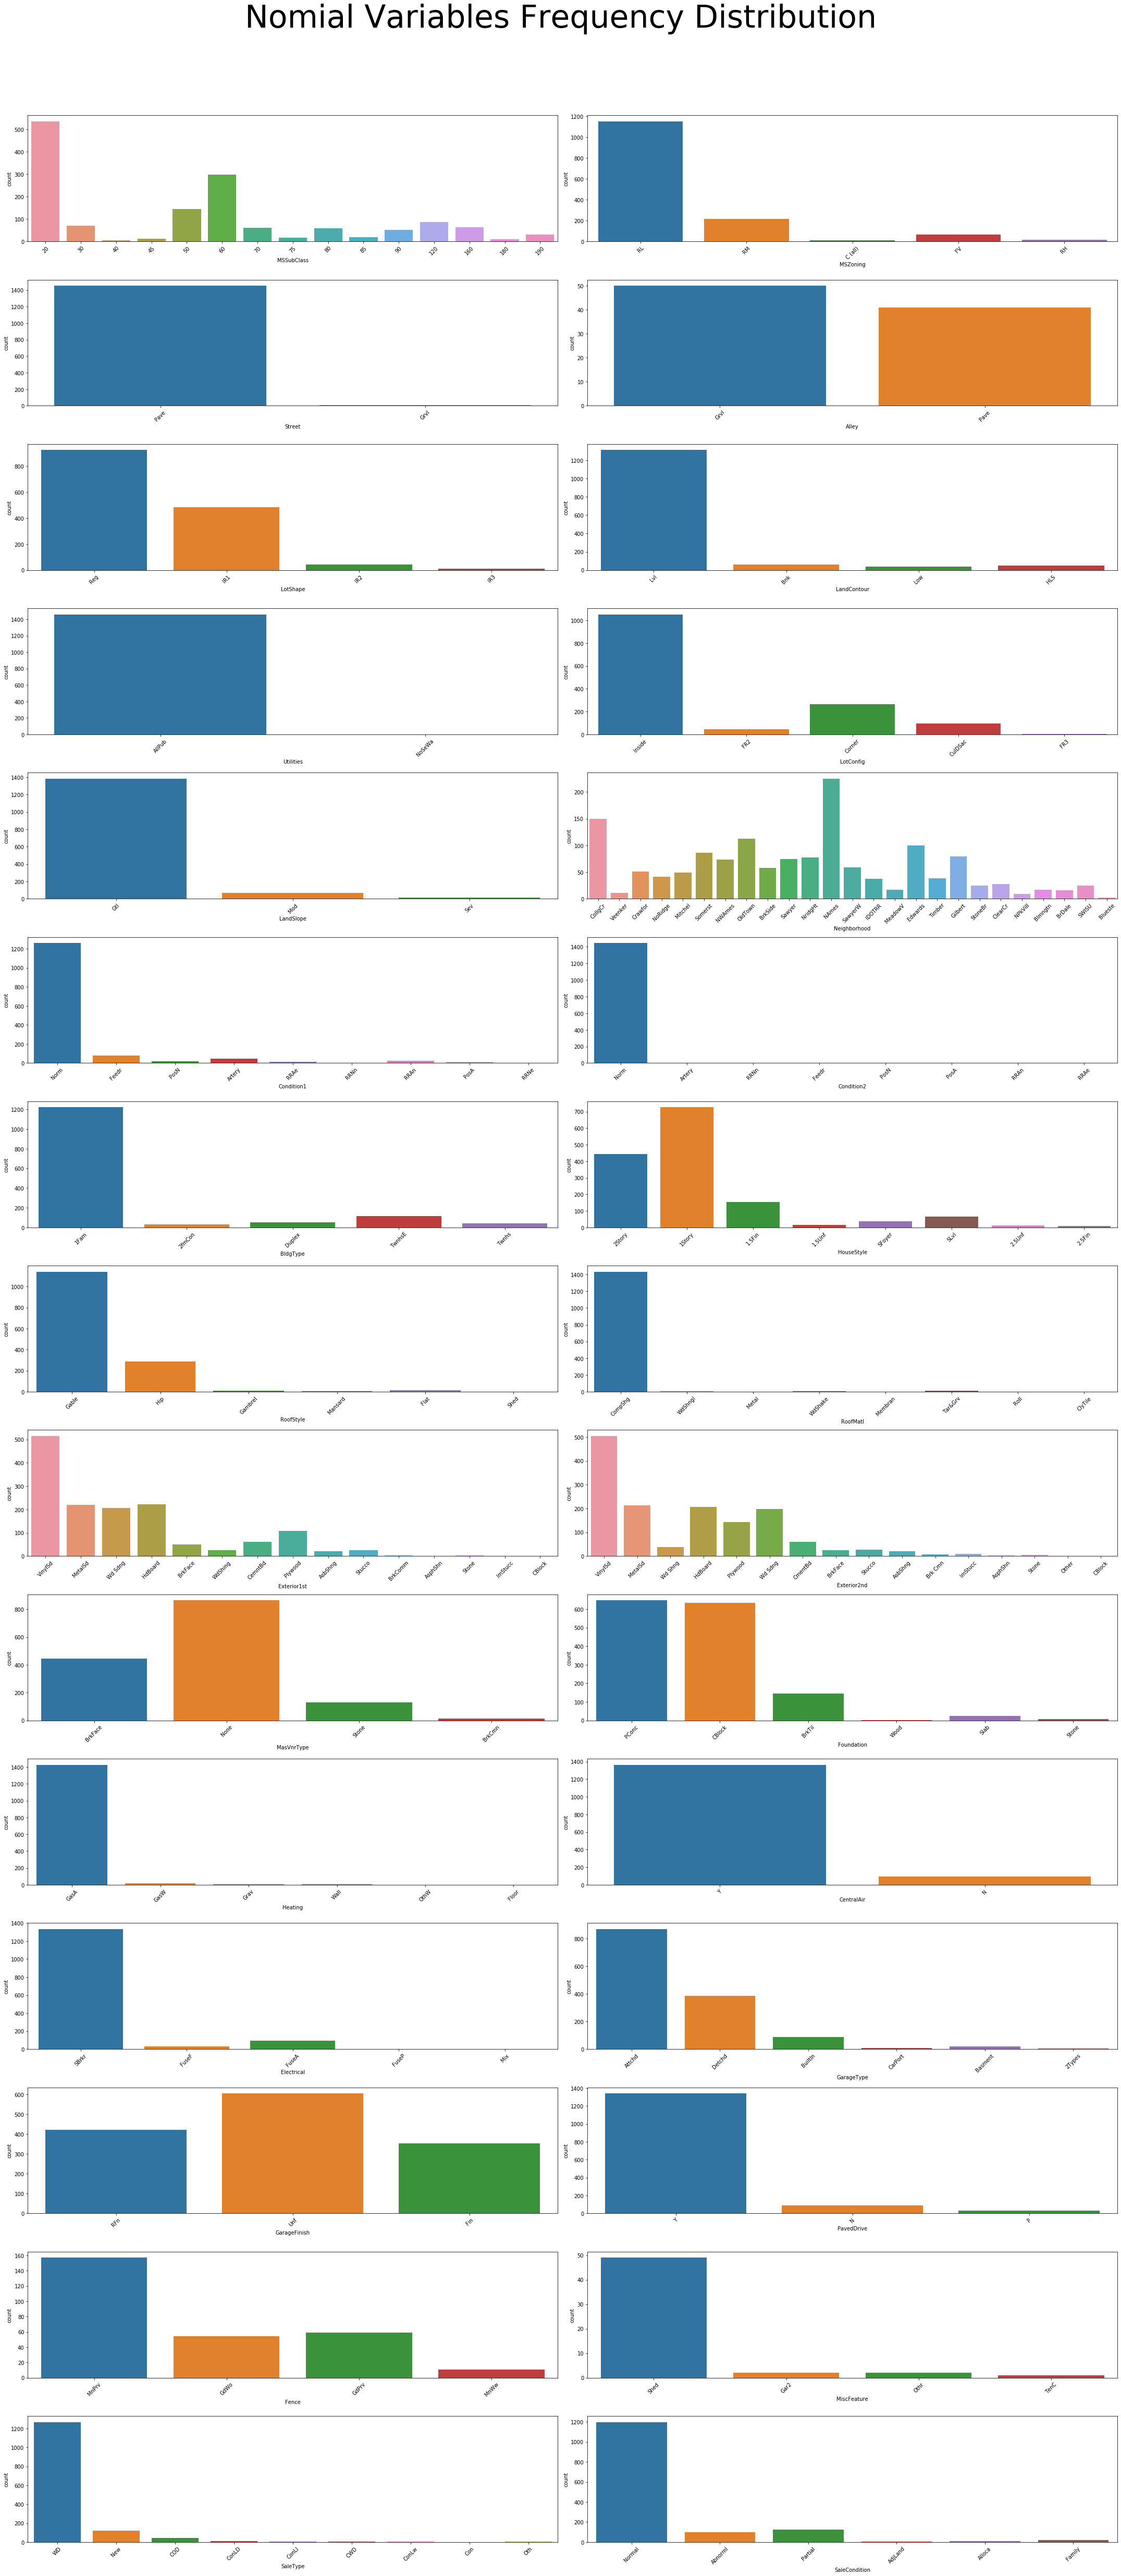

In [16]:
plot_countplot(train,nomial_list,15,2,'Nomial Variables Frequency Distribution',(30,70))

**More analysis are made by plotting the sale price range by nomial columns' unique values.**
* _**The sale price ranges for each unique value in the "Neighborhood" column.**_

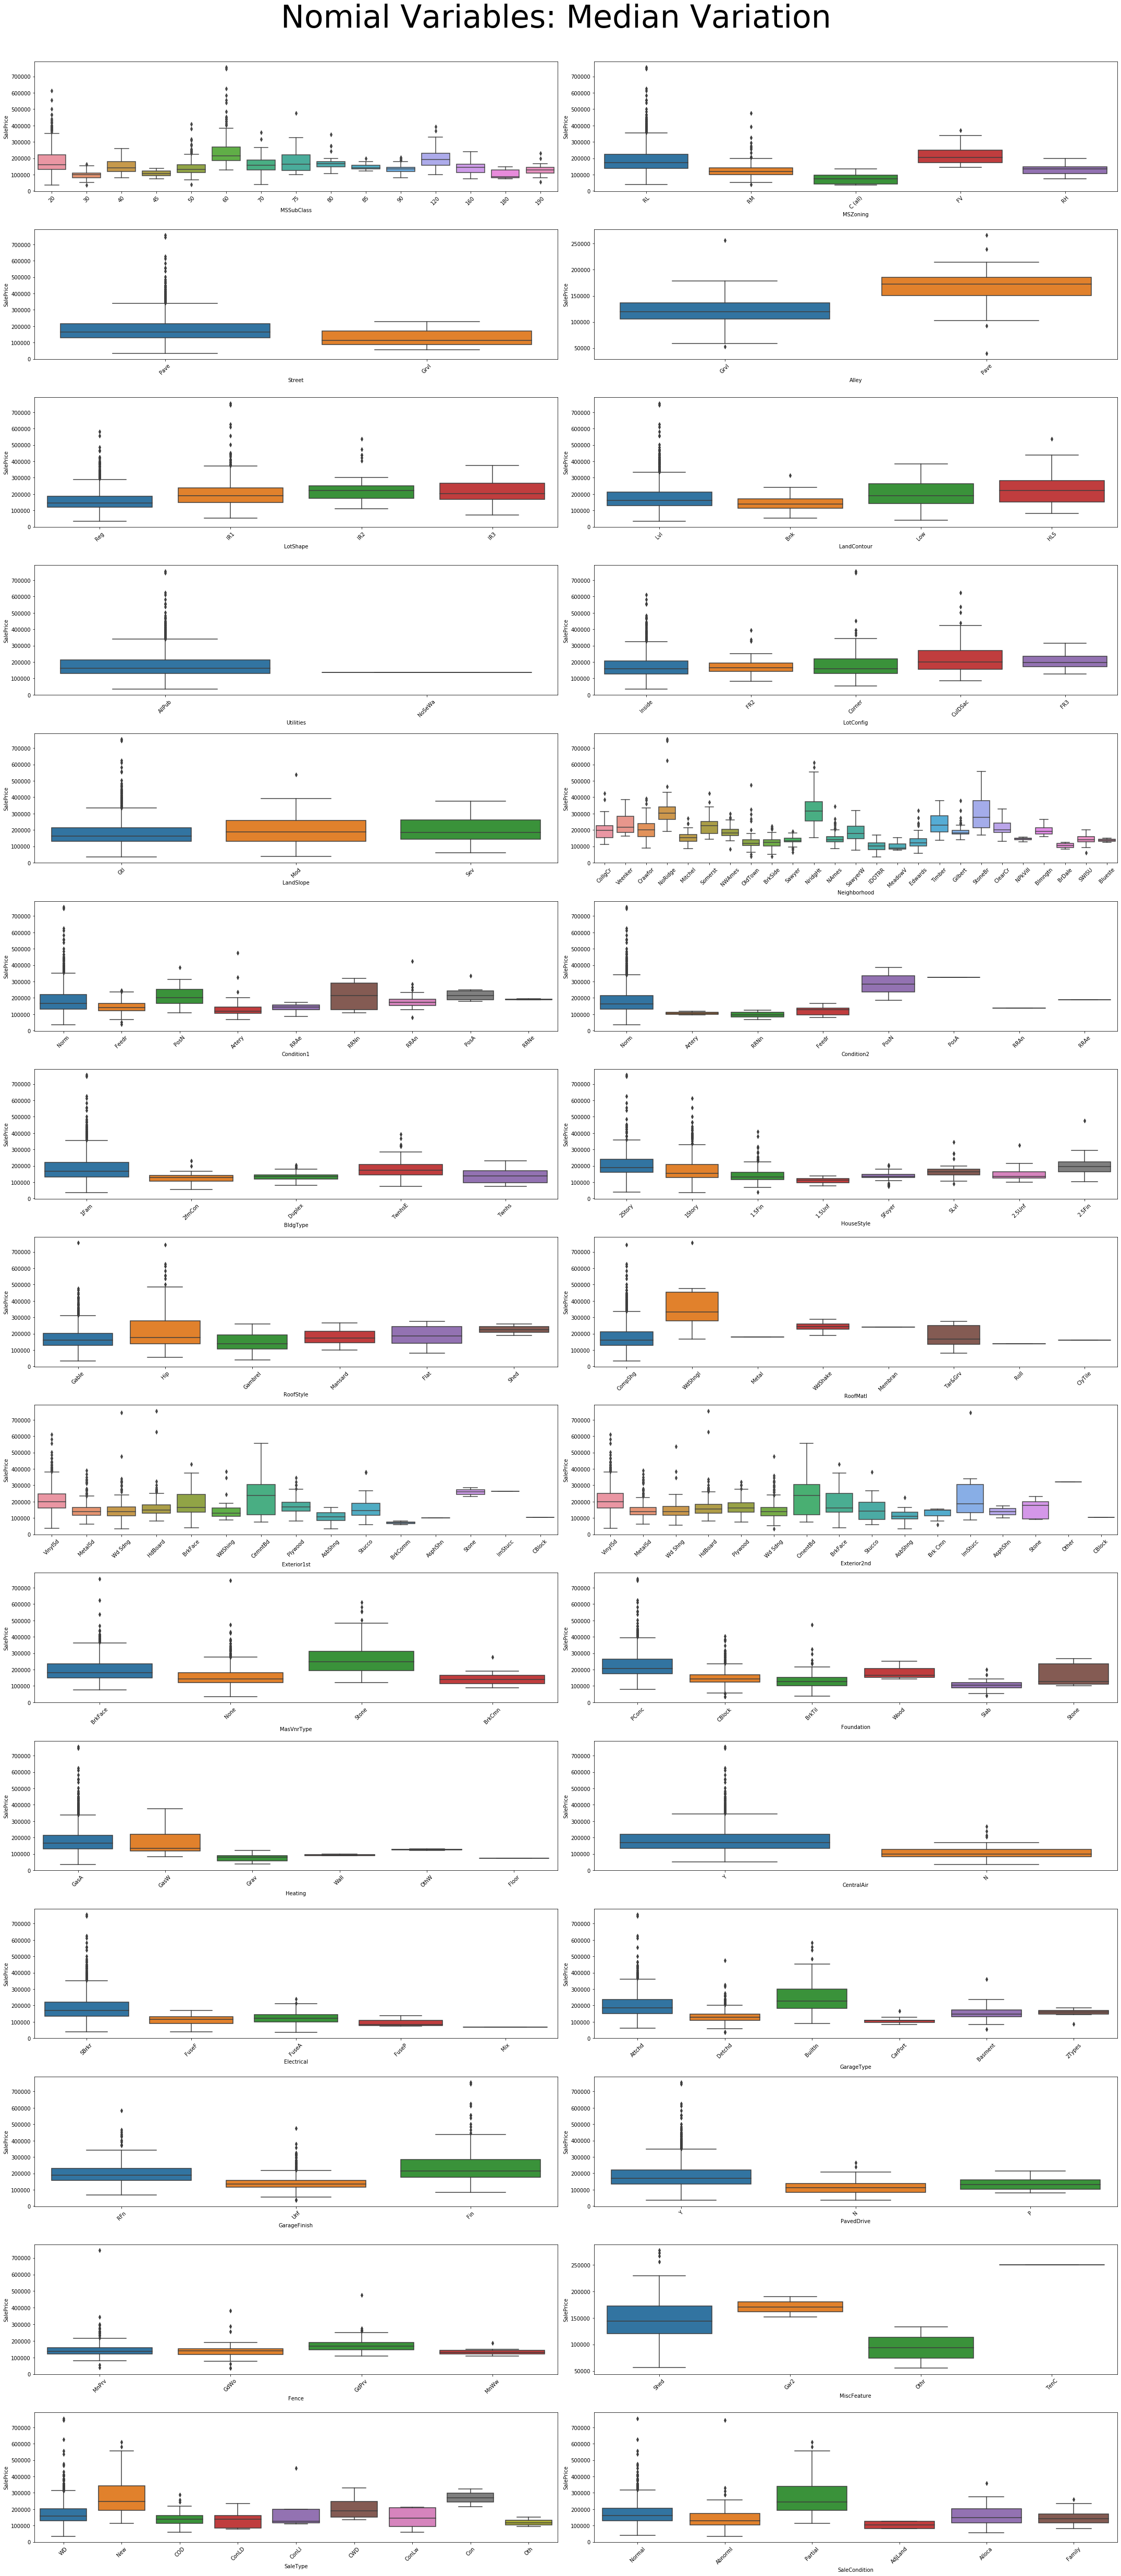

In [17]:
plot_boxplot(train,'SalePrice',nomial_list,15,2,'Nomial Variables: Median Variation ',(30,70))

**Next, ordinal columns are visualized and some analysis are made.**
* _**"OverallQual" and "OverallCond" columns have good distributions.**_
* _**"GarageCond" and "Functional" columns have weak distributions.**_

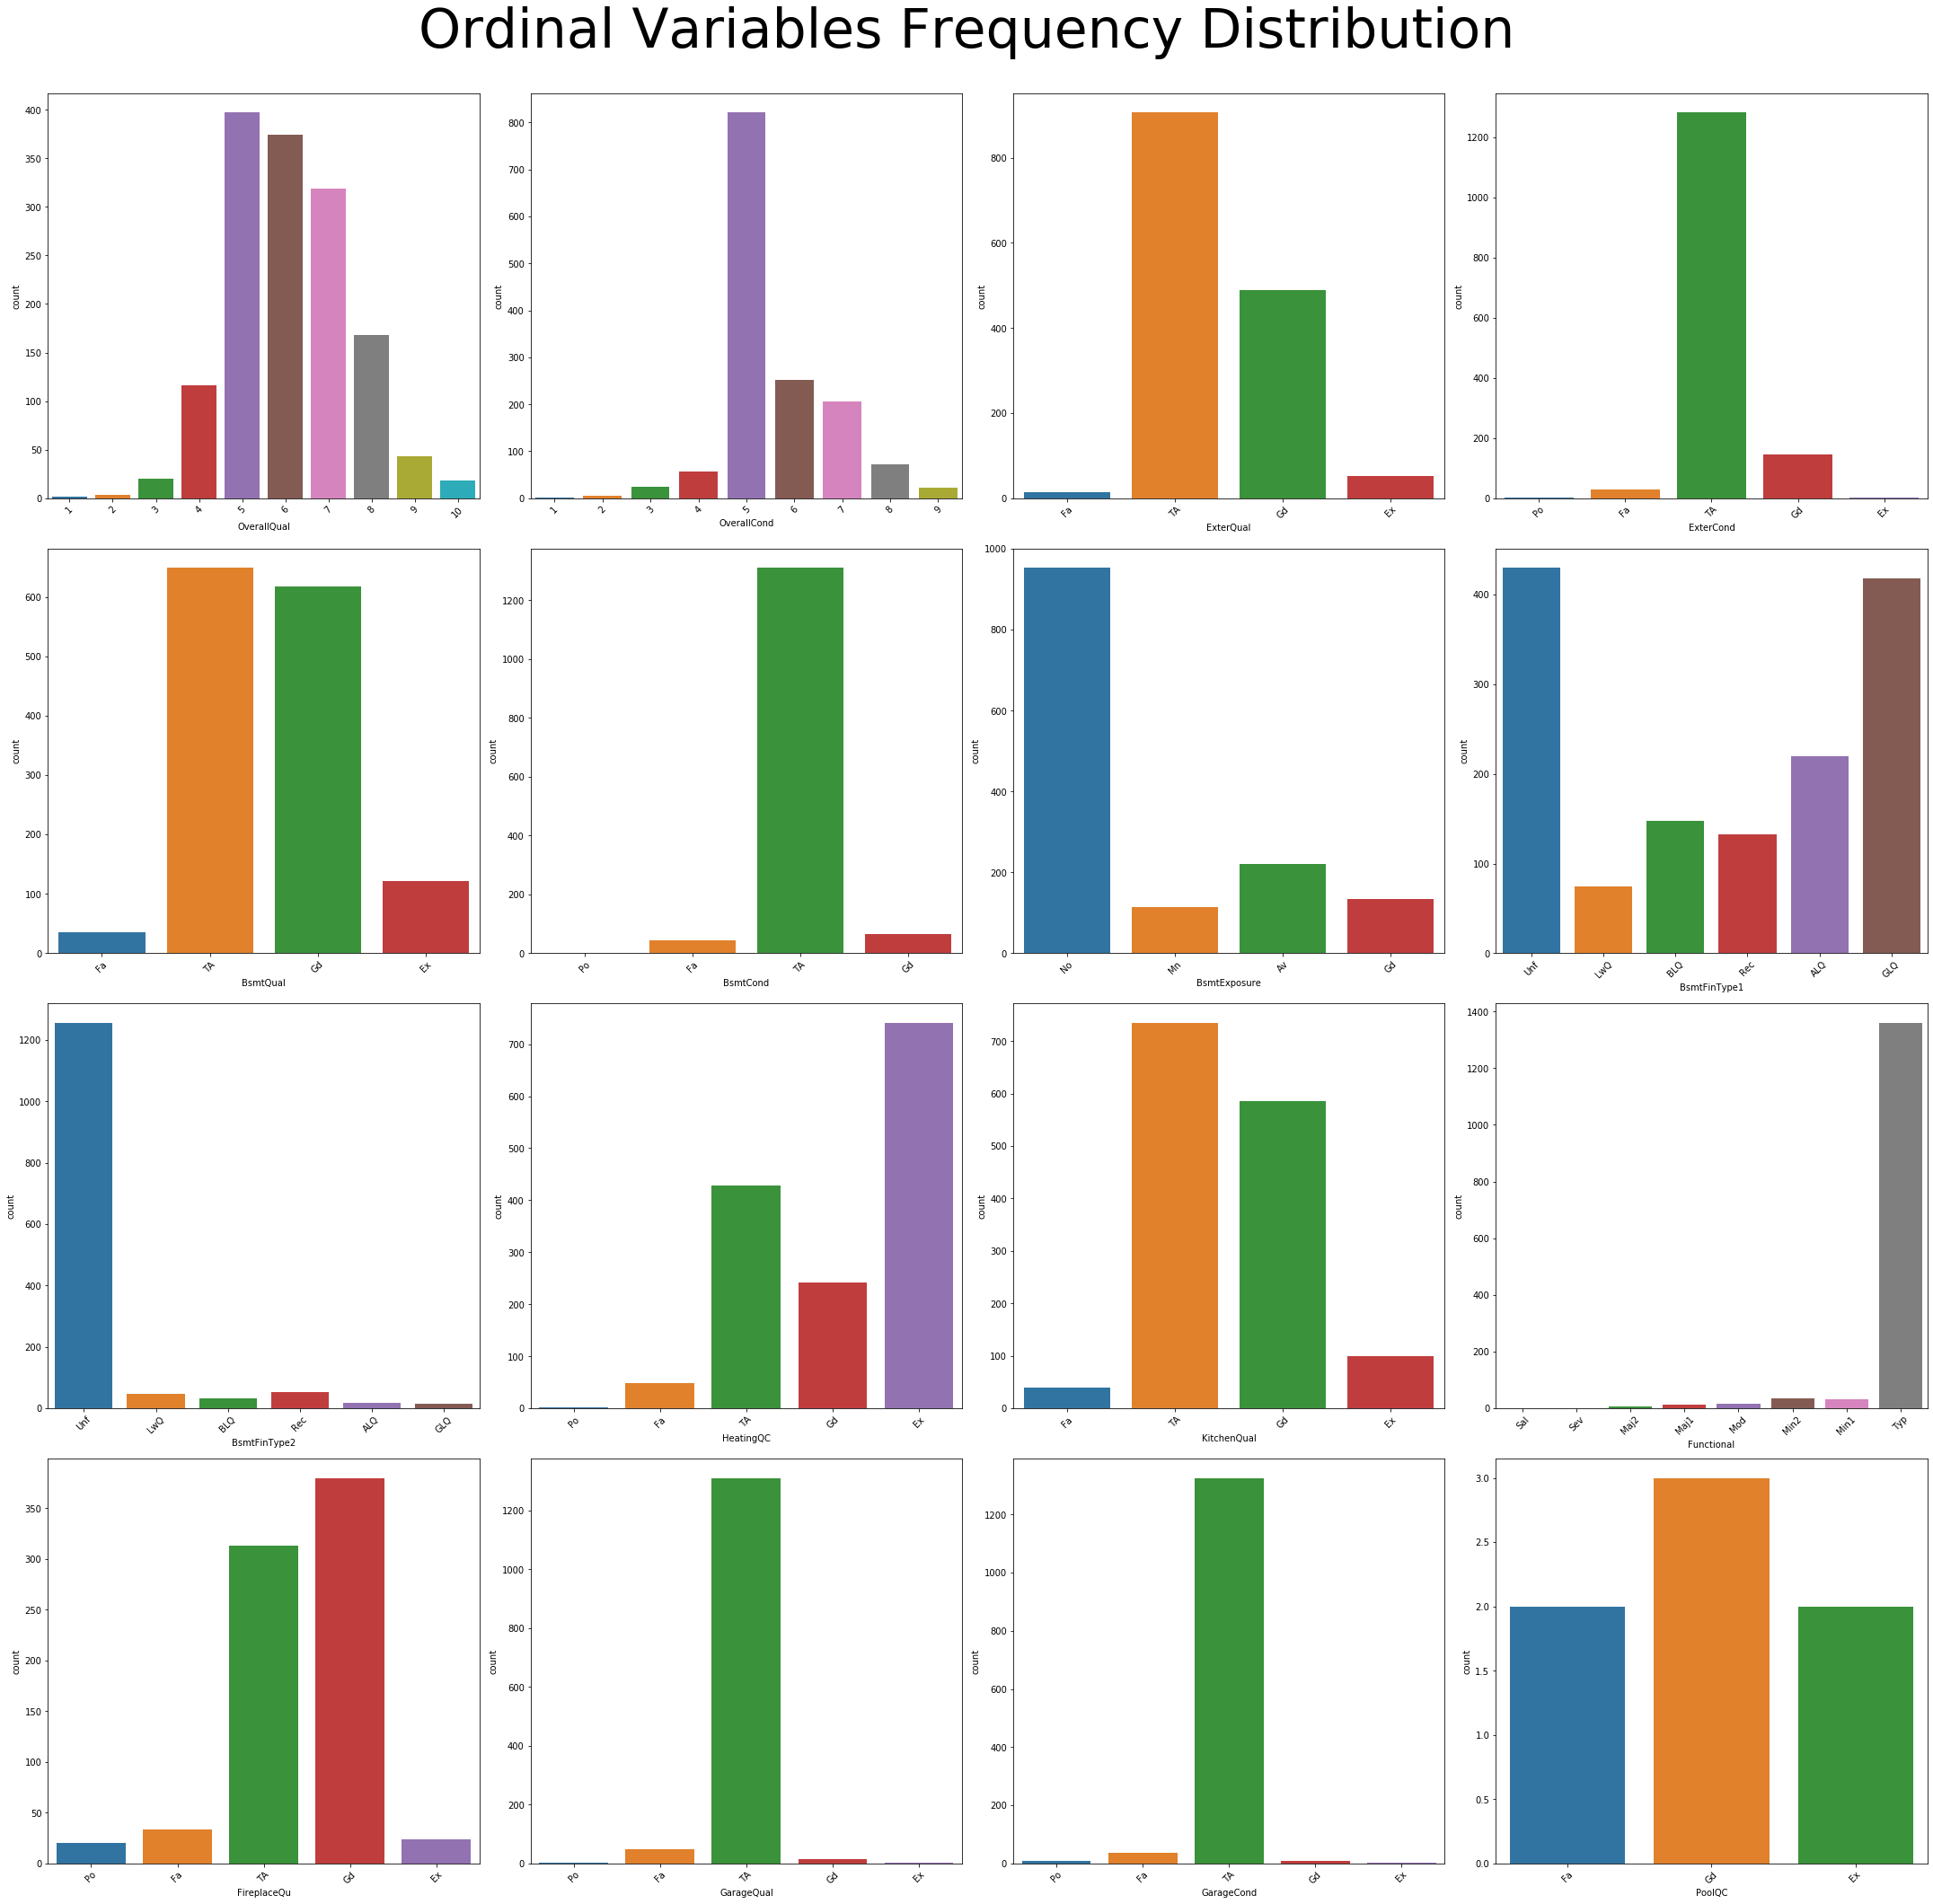

In [18]:
plot_ordinal_countplot(train,ordinal_dict,4,4,'Ordinal Variables Frequency Distribution',(30,30))

**Boxplots are visualized to depict the trend of house sale price as the ordinal value increases.**
* _**The range of the sale price increases as the overall condition and exterior quality of the house increases.**_

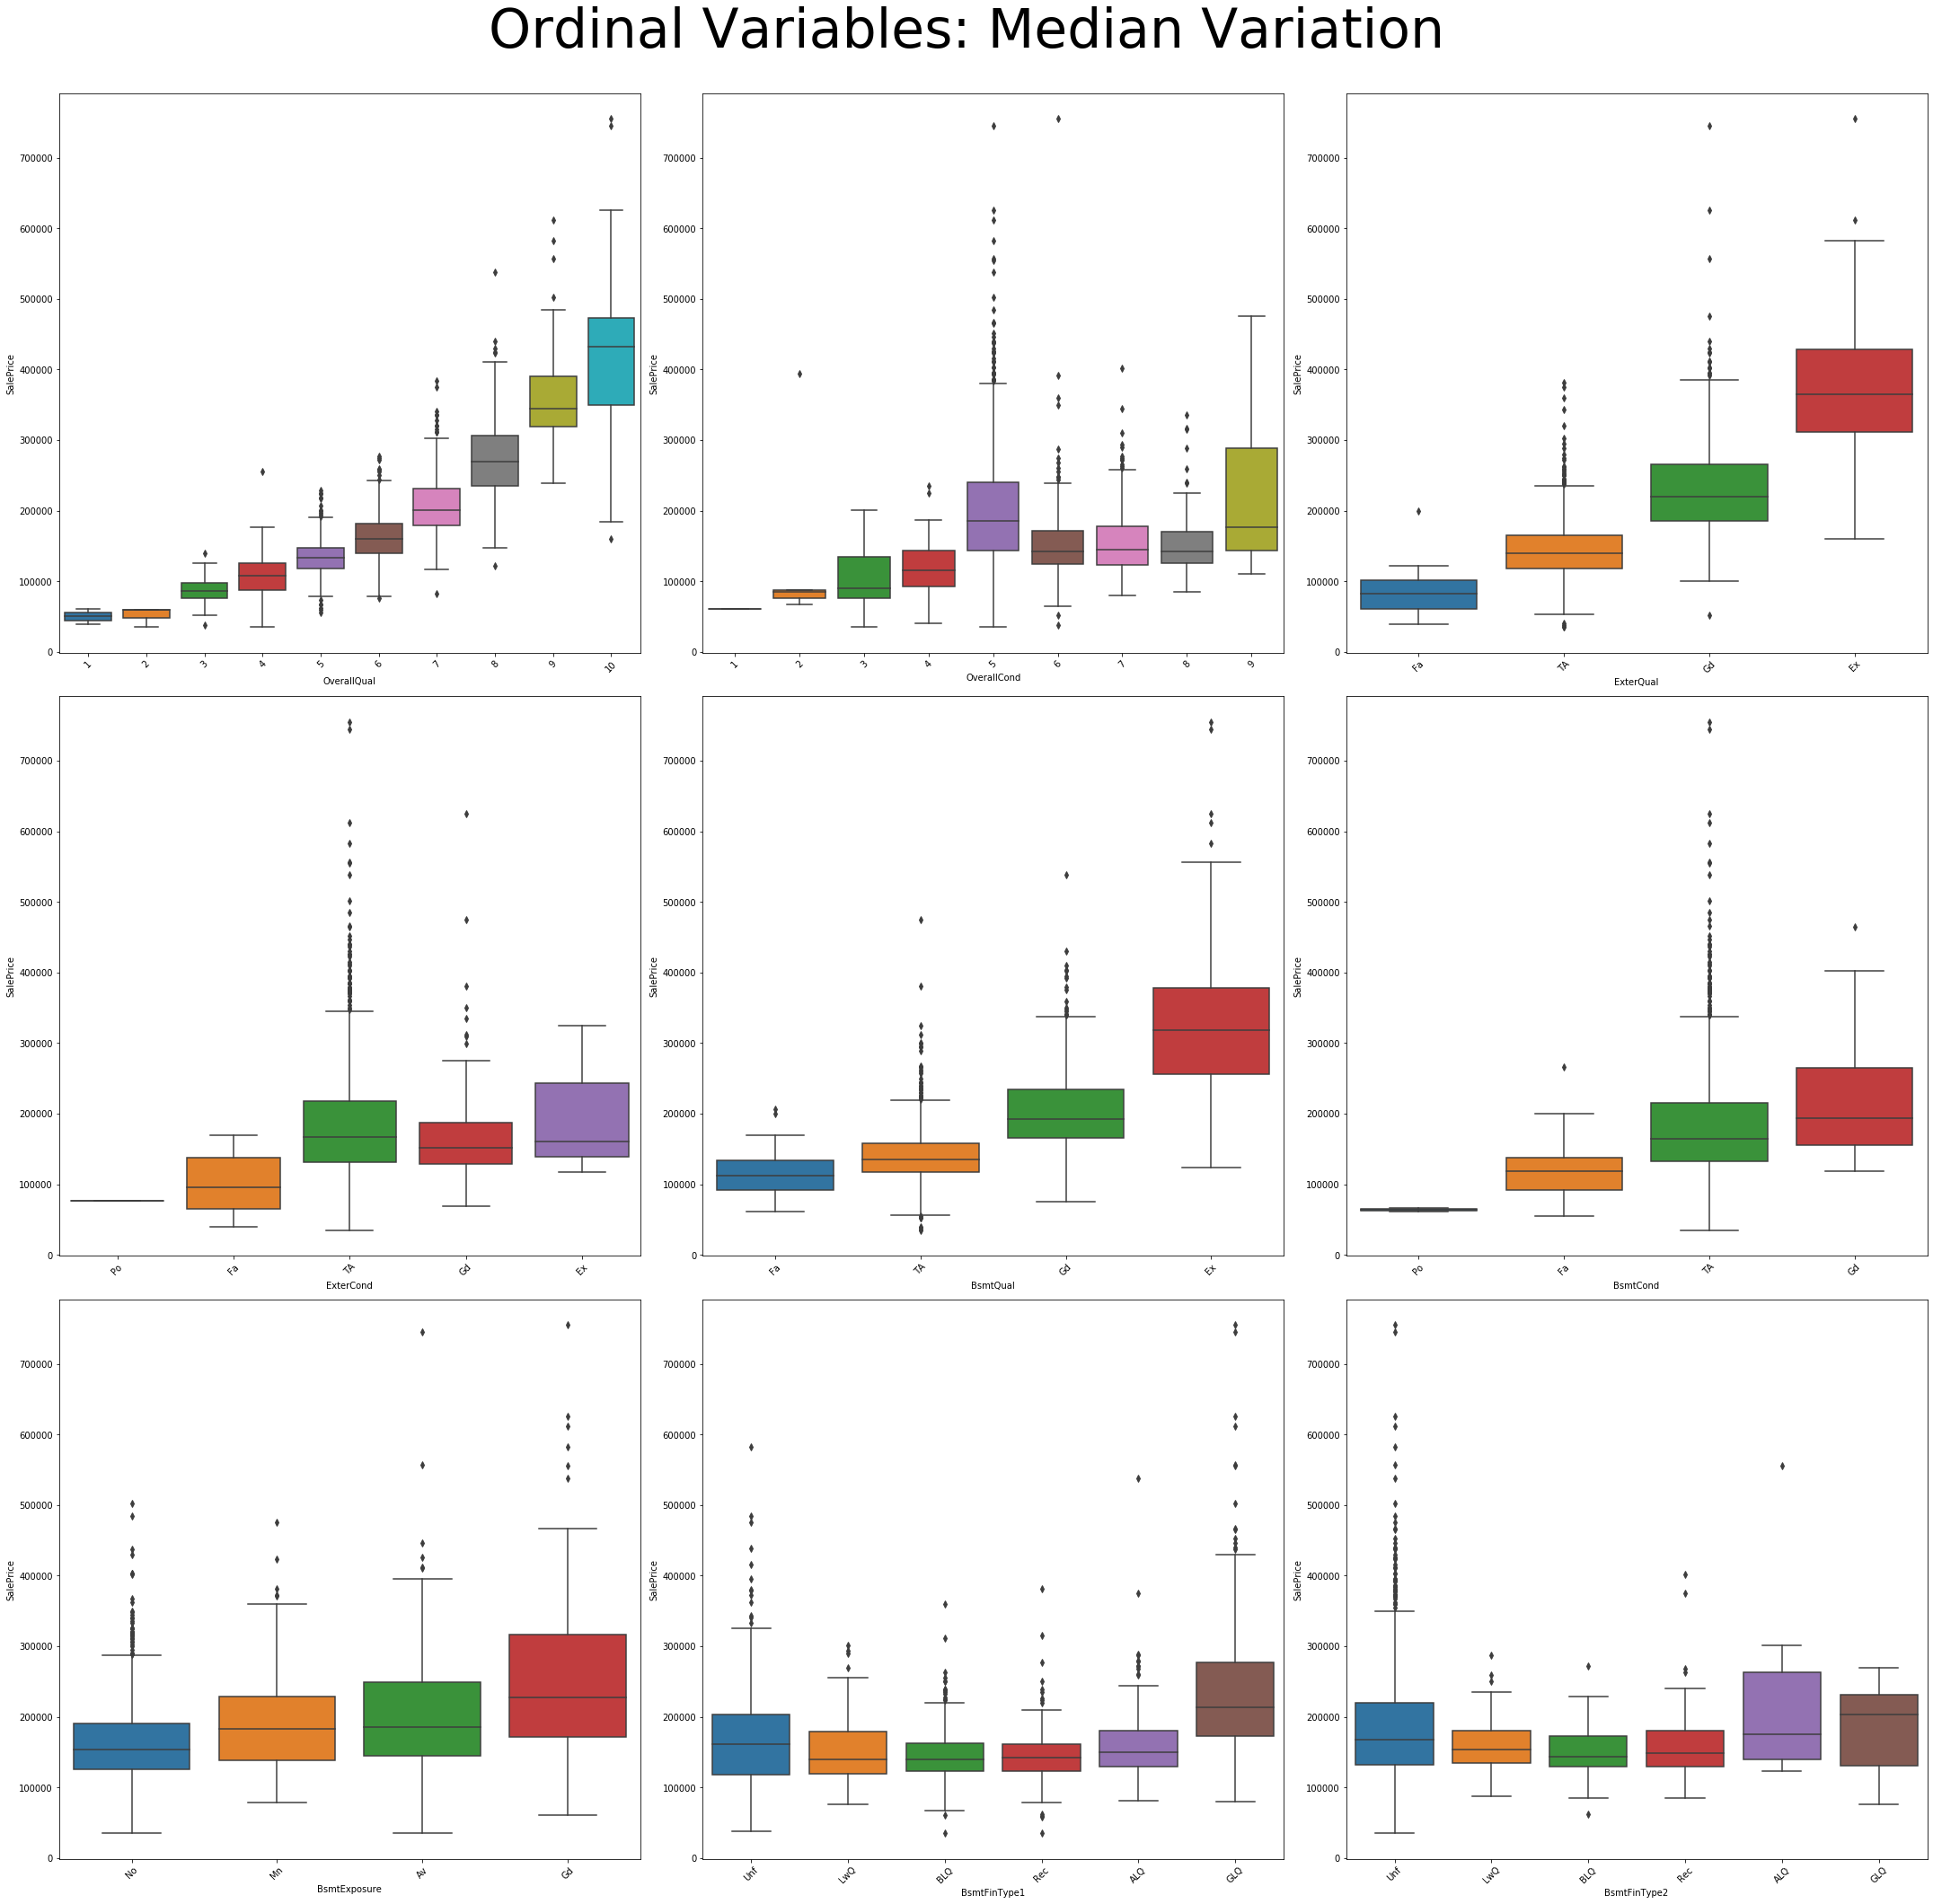

In [19]:
plot_ordinal_boxplot(train,'SalePrice',ordinal_dict,3,3,'Ordinal Variables: Median Variation',(30,30))

**Some analysis are made after visualizing the distribution of discrete columns**
* _**"TotRmsAbvGrd" column has a good distribution.**_
* _**Houses that were sold commonly had three bedrooms above ground.**_

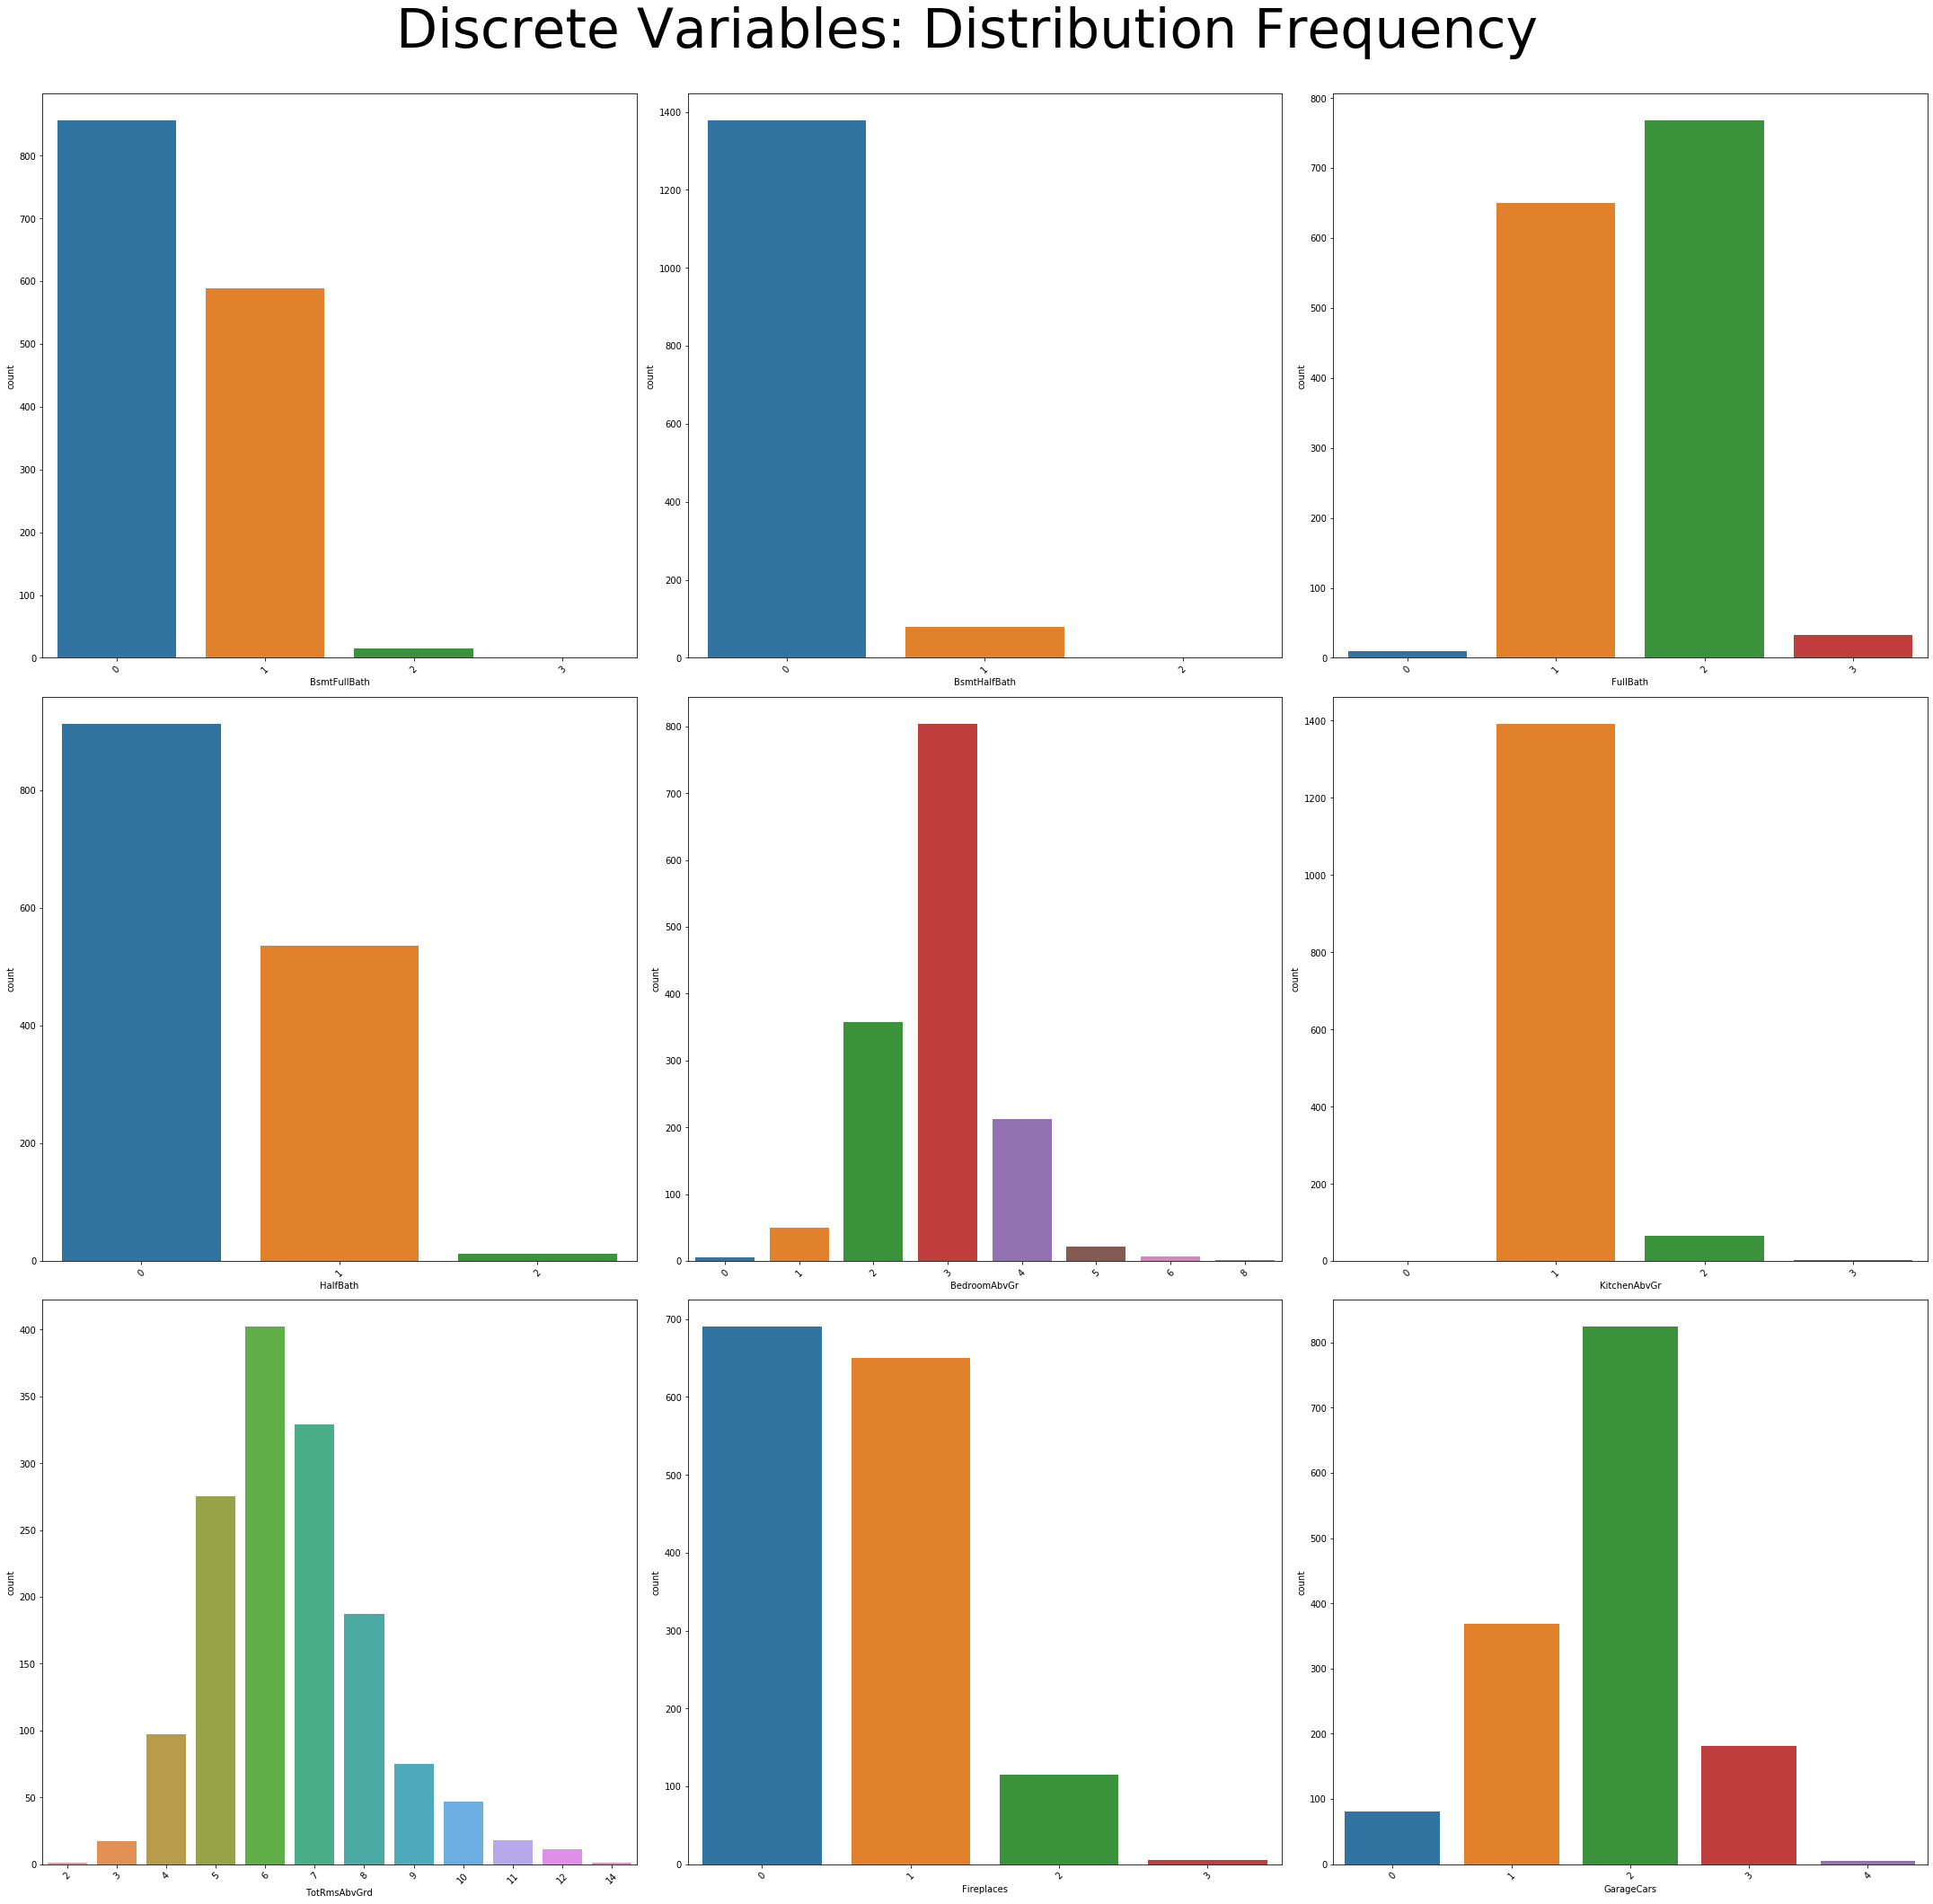

In [20]:
plot_countplot(train,disc_num_list,3,3,'Discrete Variables: Distribution Frequency',(30,30))

**More analysis are made by visualizing boxplots.**
* _**Although the "TotRmsAbvGrd" column has good distribution, the sale price range trends downwards after 10 rooms. This can have a detrimental affect on a model's learning capability.**_


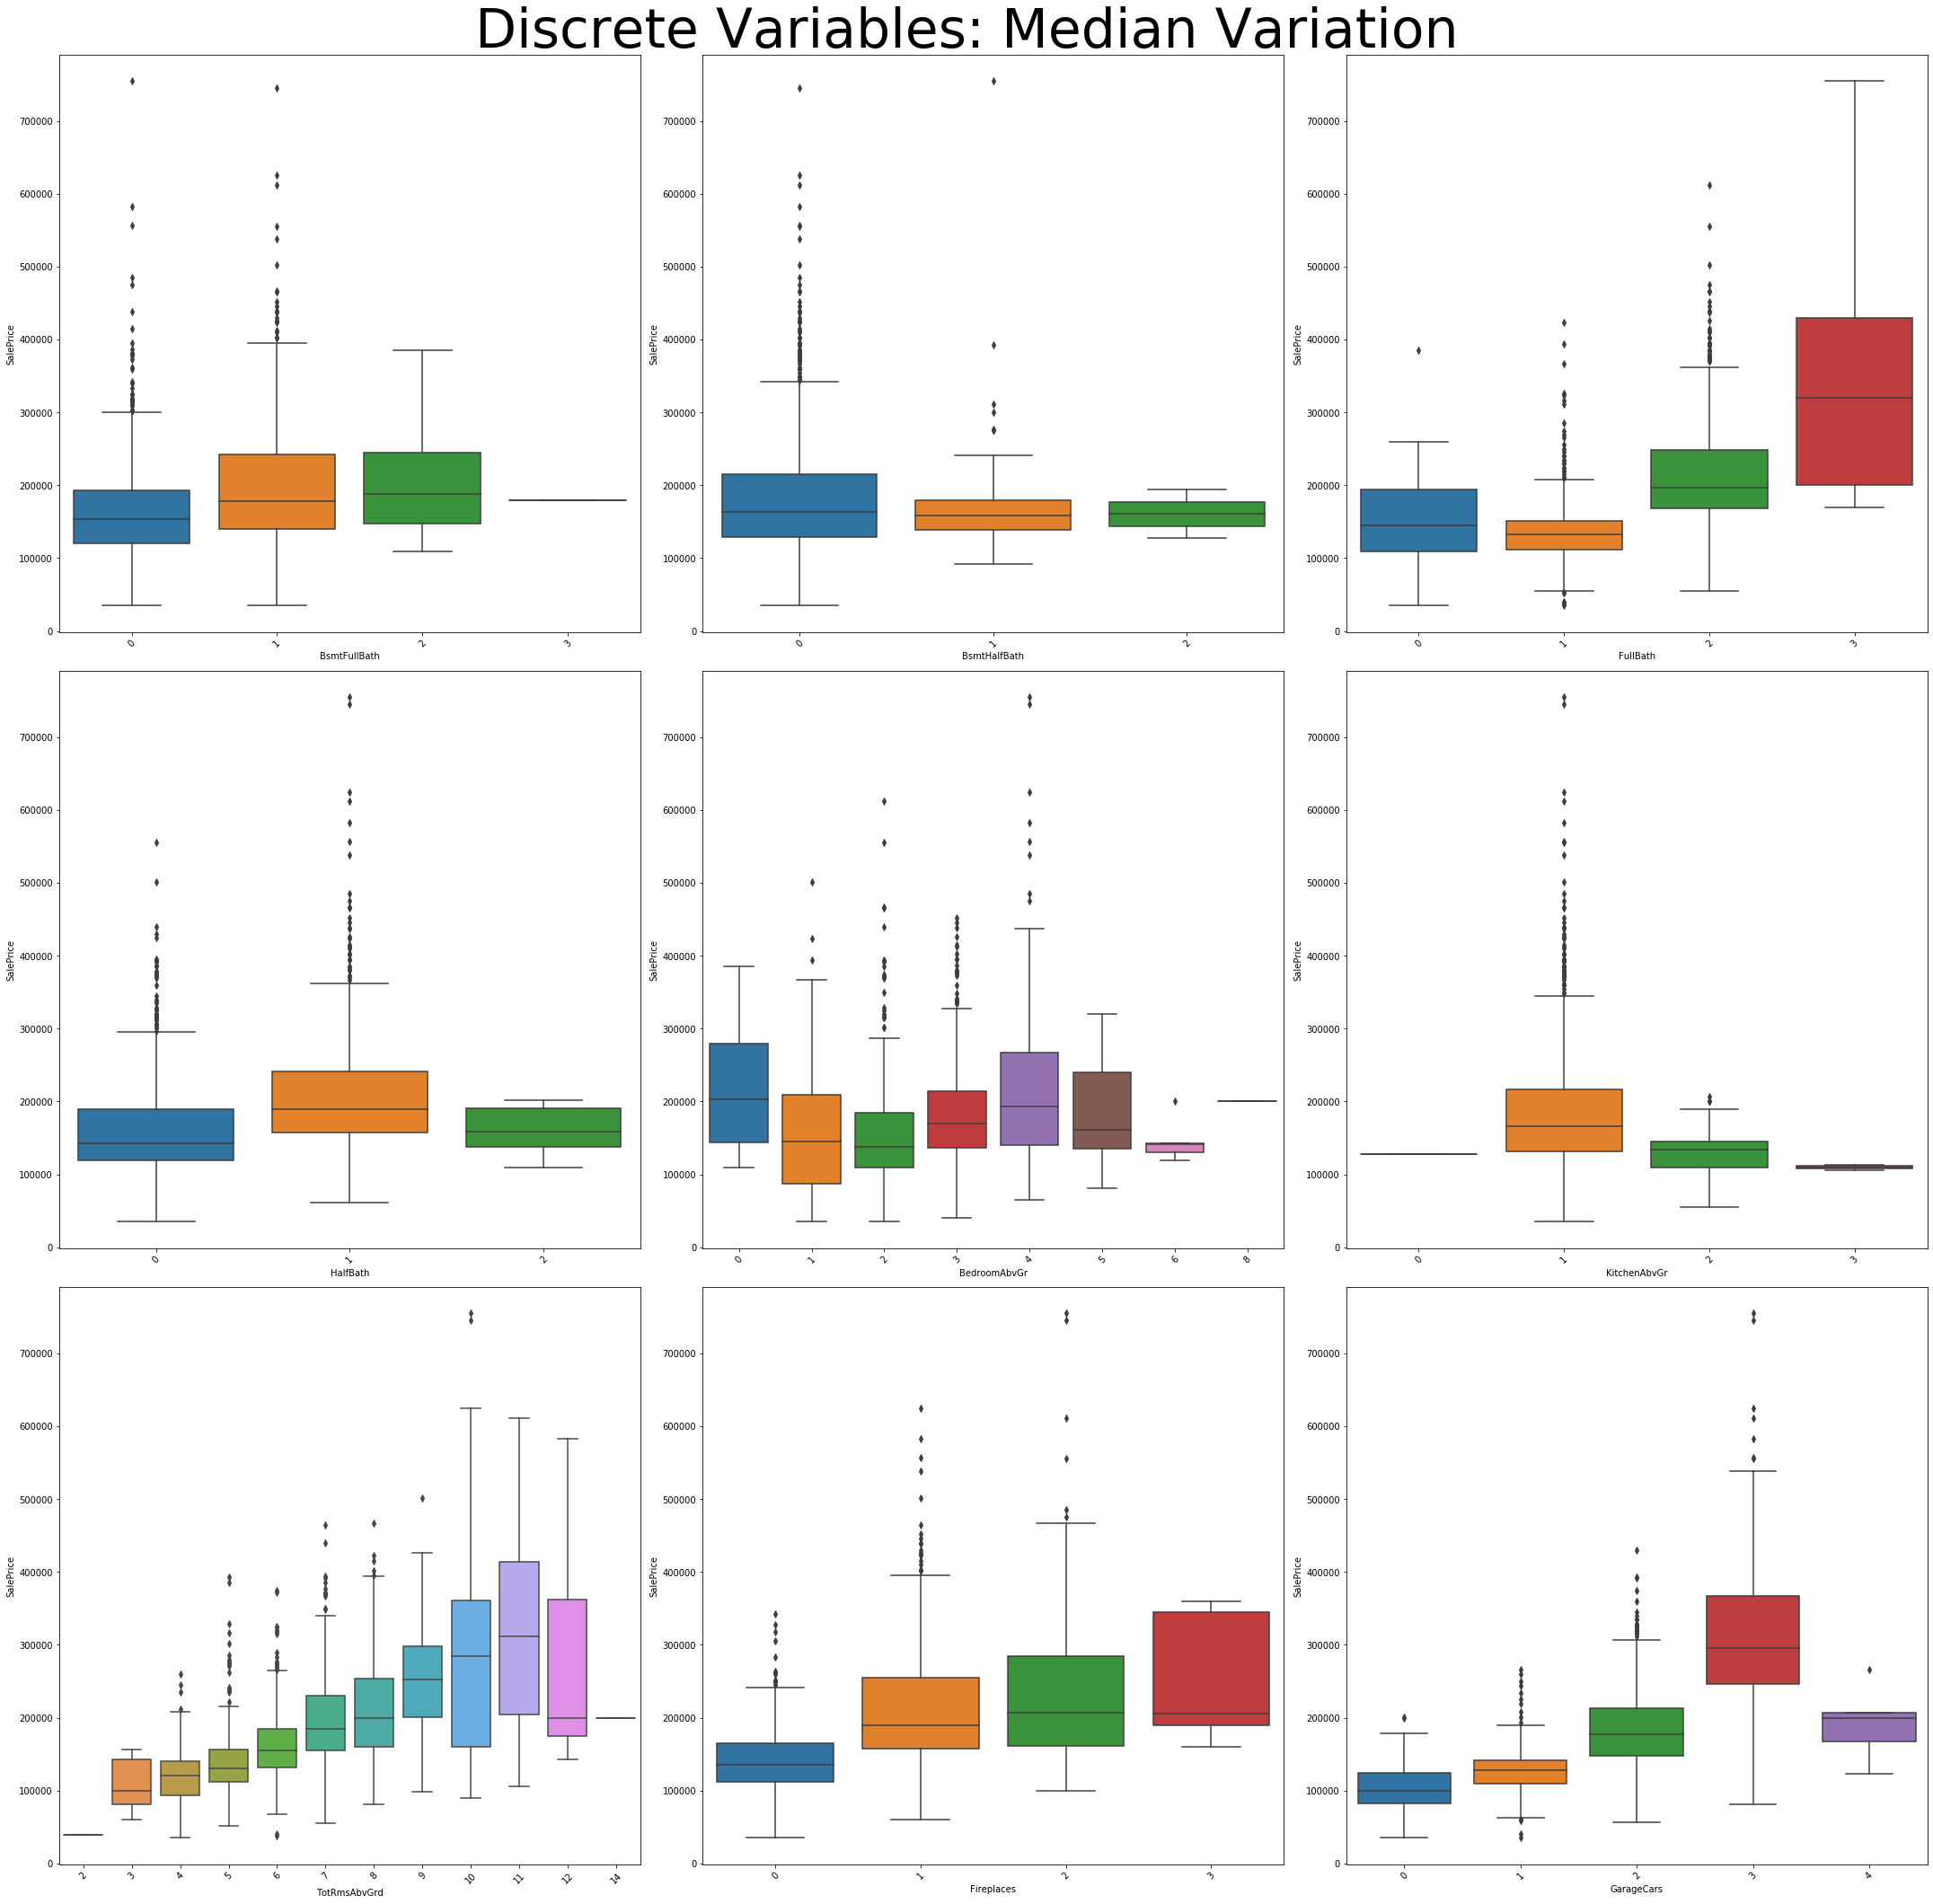

In [21]:
plot_boxplot(train,'SalePrice',disc_num_list,3,3,'Discrete Variables: Median Variation',(30,30))

**Distributions for continuous variables are visualized for analysis.**<br>
**The following columns have an approximate normal distribution:**
* _**LotFrontage**_
* _**LotArea**_
* _**TotalBsmtSF**_
* _**1stFlrSF**_
* _**GrLivArea**_
* _**GarageArea**_


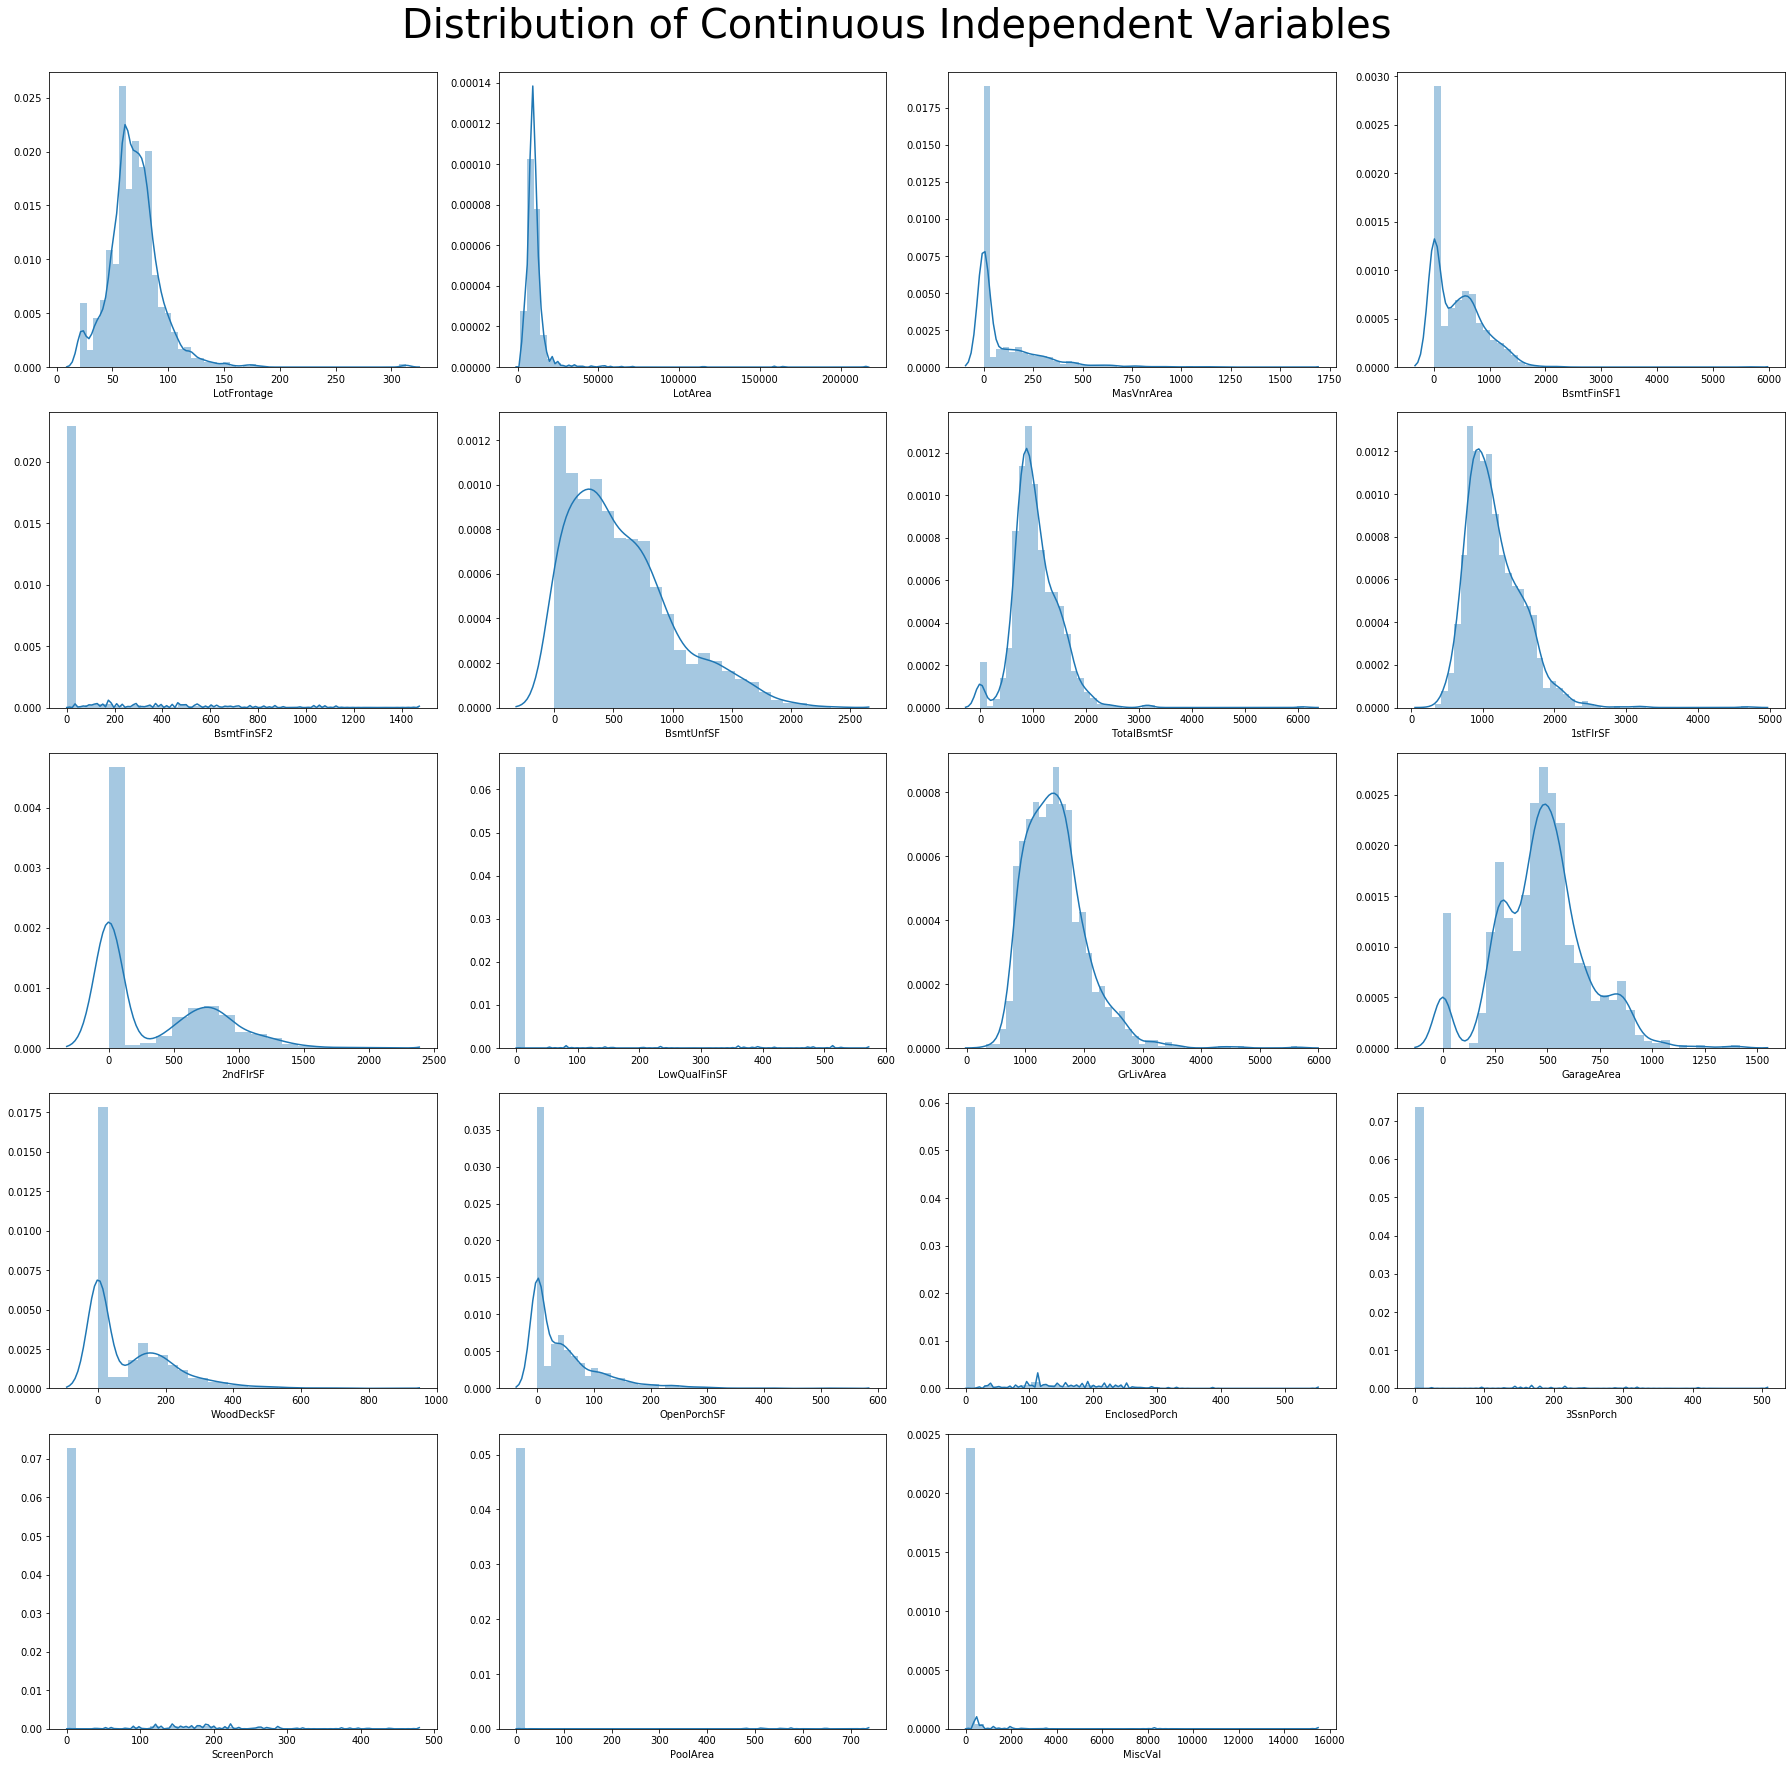

In [22]:
plot_hist(train,cont_num_list,5,4,'Distribution of Continuous Independent Variables',plot_size = (25,25))

**Scatter plots are visualized to check for linearity as well as outliers.**<br>
**The following columns have a strong positive correlation with house sale price:**
* _**1stFlrSF**_
* _**GrLivArea**_
  
**There are extreme values in the "GrLivArea" column that is affecting the linearity.**

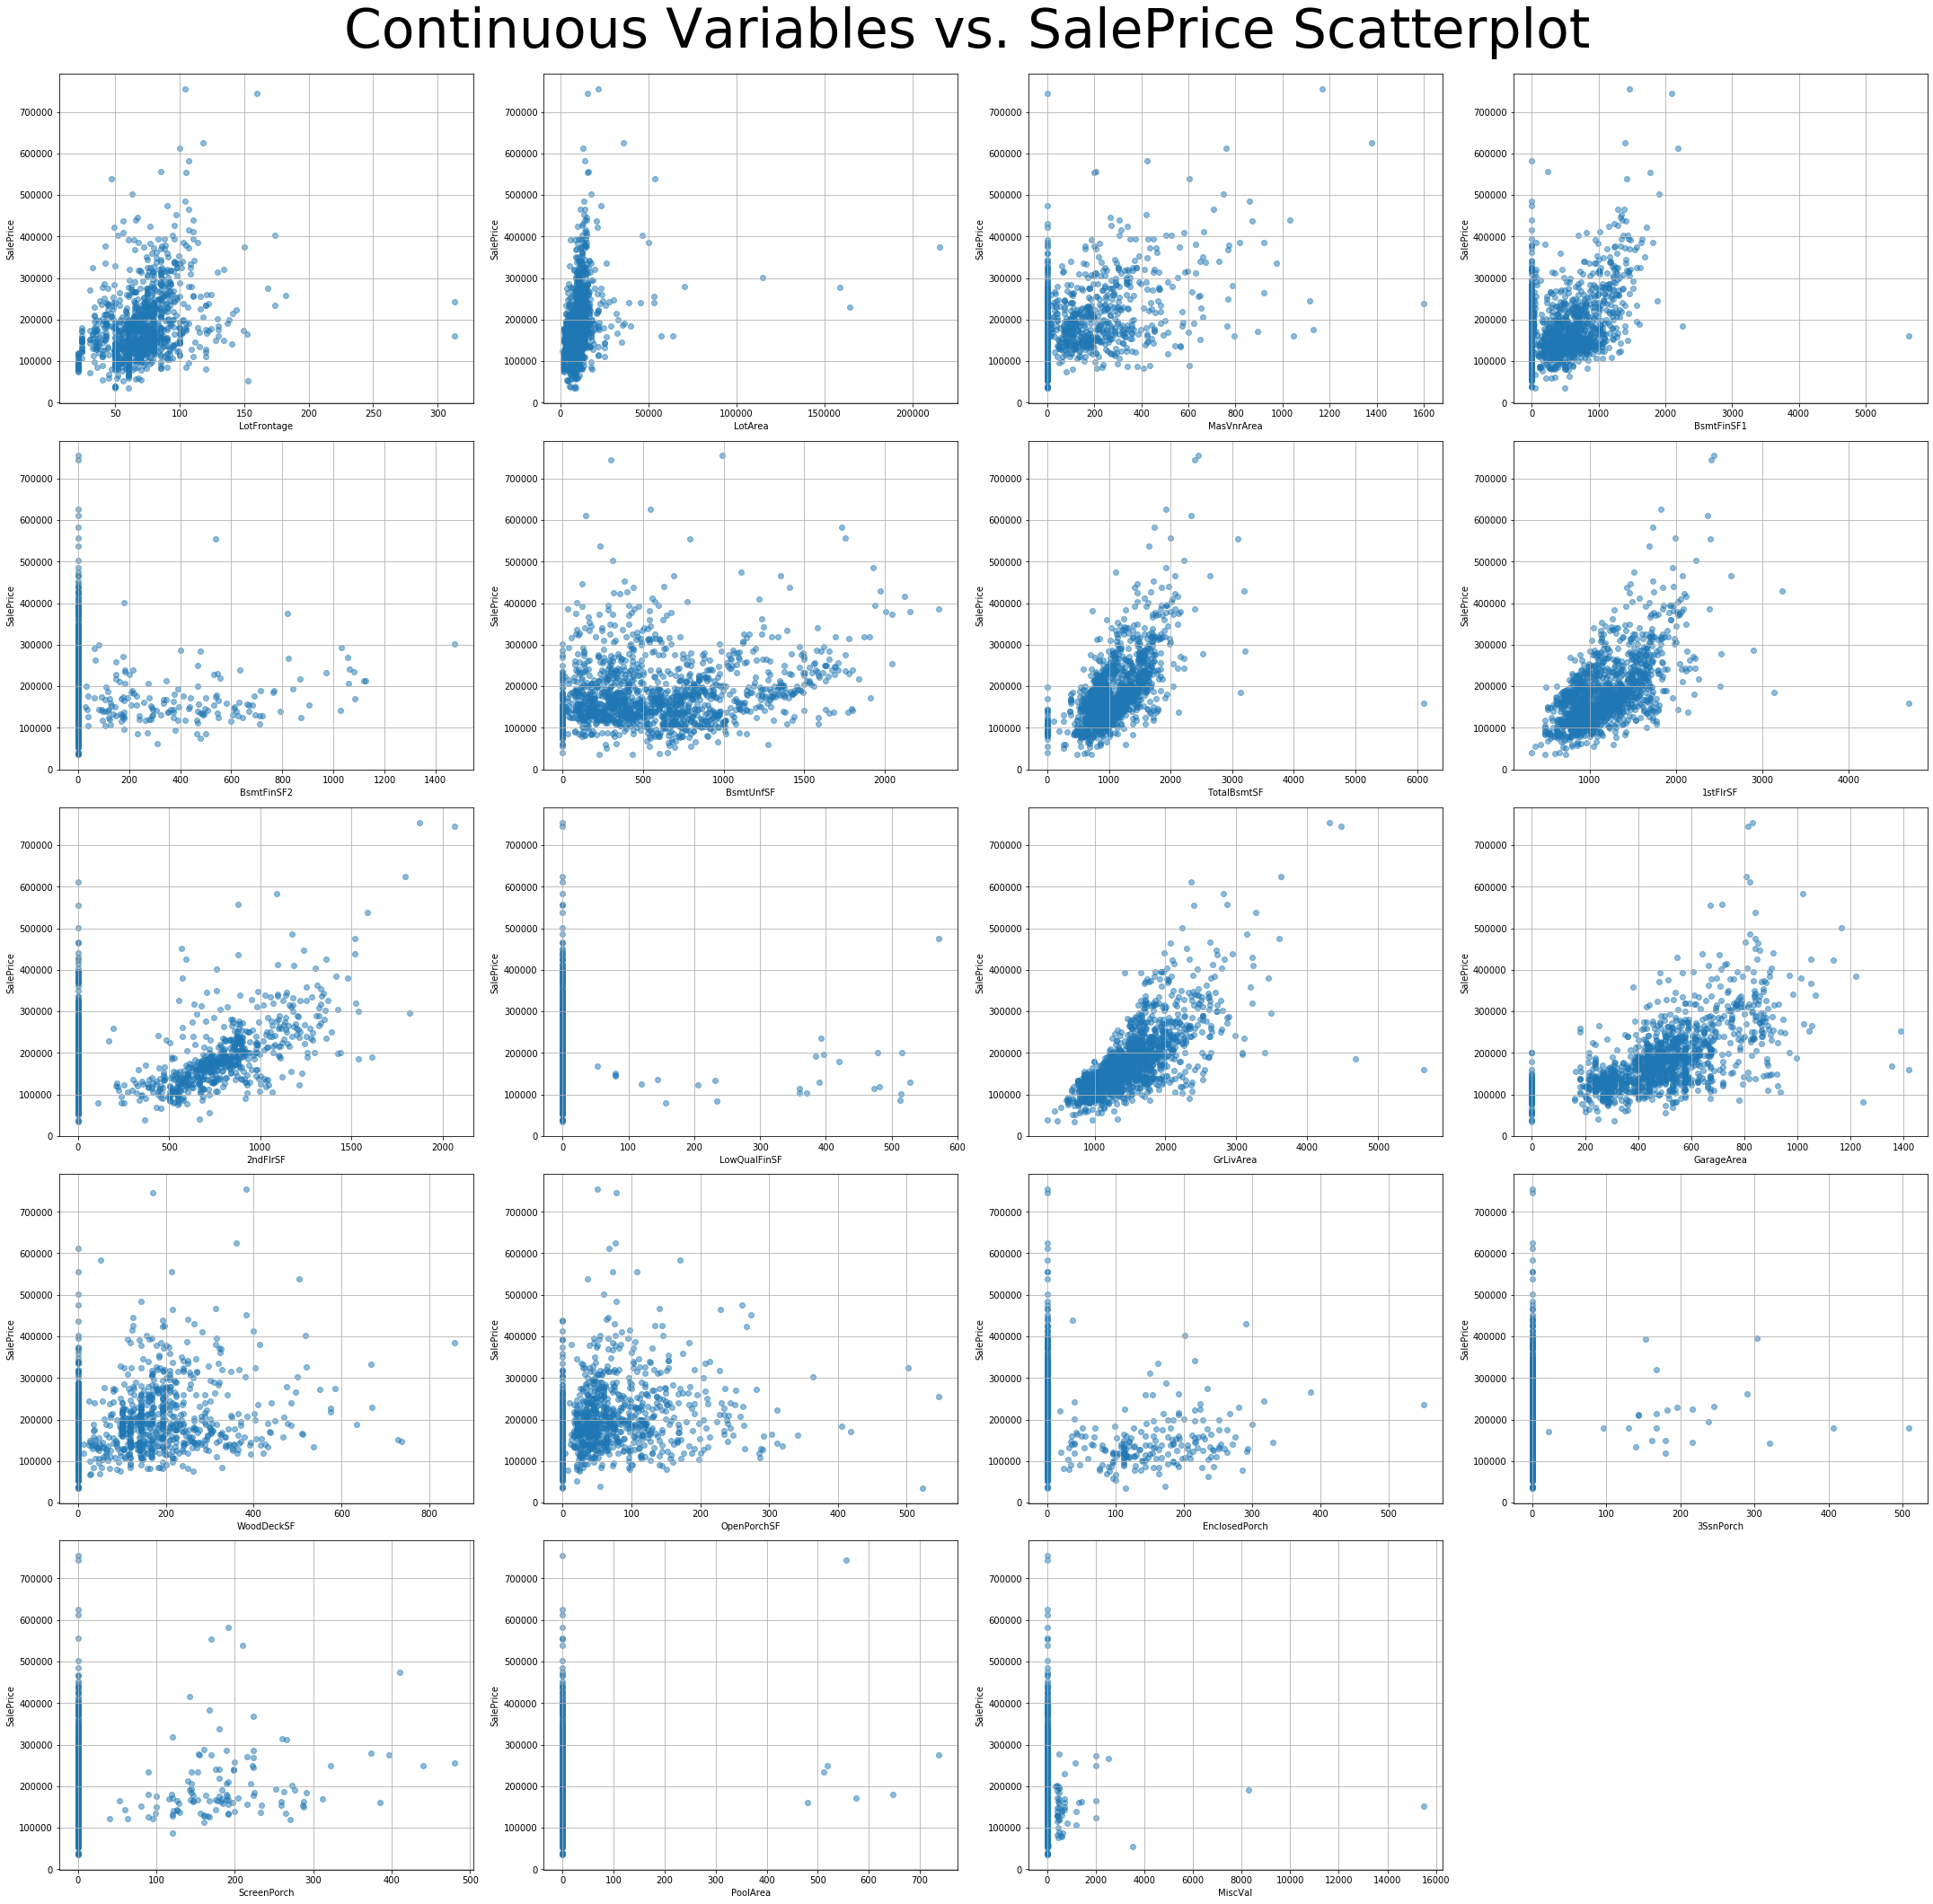

In [23]:
plot_scatter(train,'SalePrice',cont_num_list,5,4,'Continuous Variables vs. SalePrice Scatterplot',(30,30))

**A correlation matrix is visualized to check for multicollinearity.**
* _**Columns "TotalBsmtSF" and "1stFlrSF" are highly correlated.**_

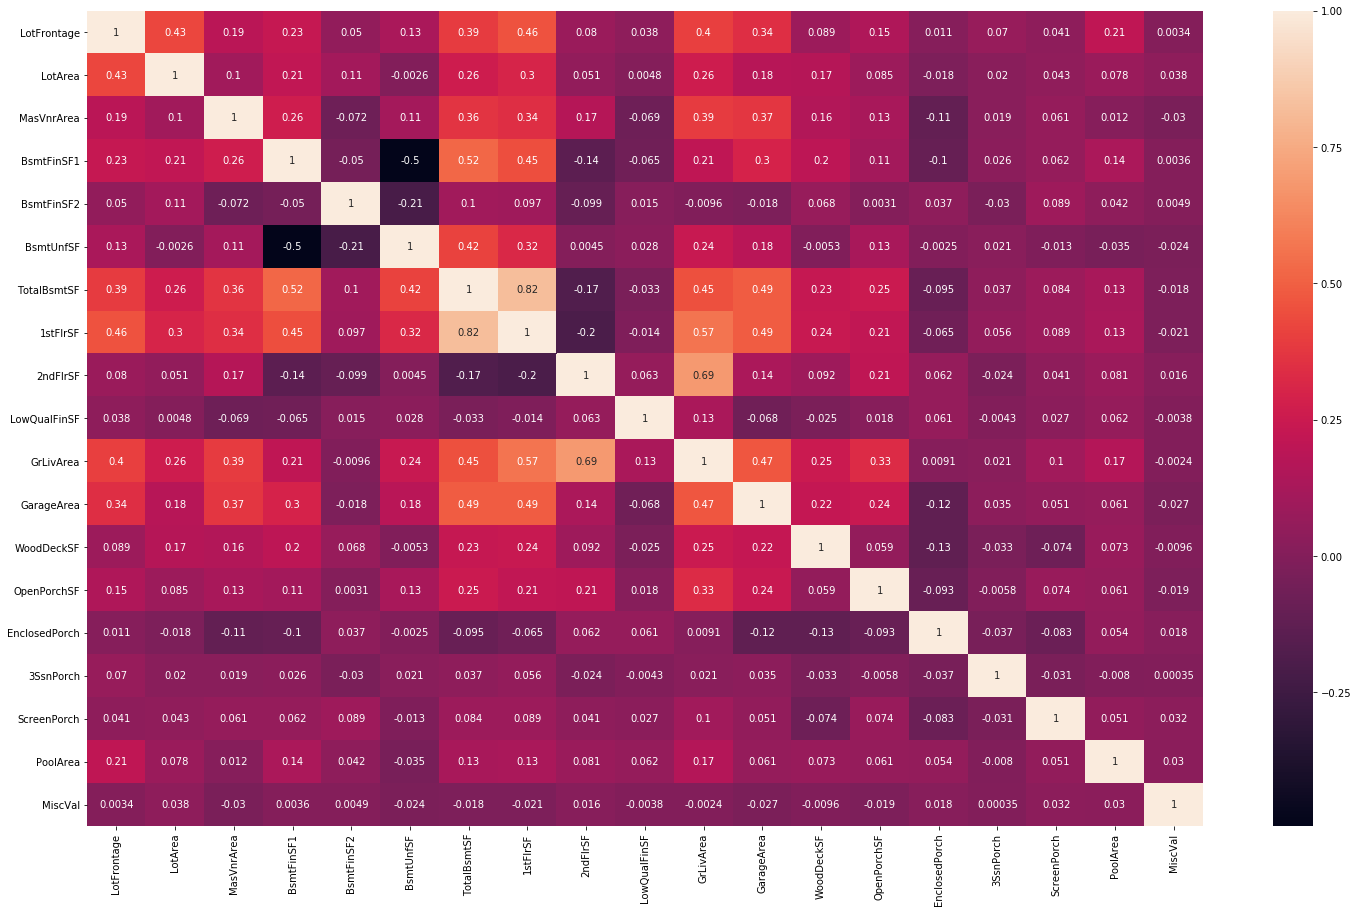

In [24]:
fig = plt.figure(figsize = (25,15))
sns.heatmap(train[cont_num_list].corr(),annot = True)
fig.show()

**Sale price trend over time is visualized to help with analysis.**<br>
**The following observations can be made:**
* _**Sale price tends to increase for newer houses.**_
* _**Sale price tends to increase the more recent a house was renovated.**_
* _**Sale price tends to increase the newer the garage is.**_
* _**Sale price crashed during 2008 (Great Recession).**_
* _**Sale price peaks in September and plummets in April.**_

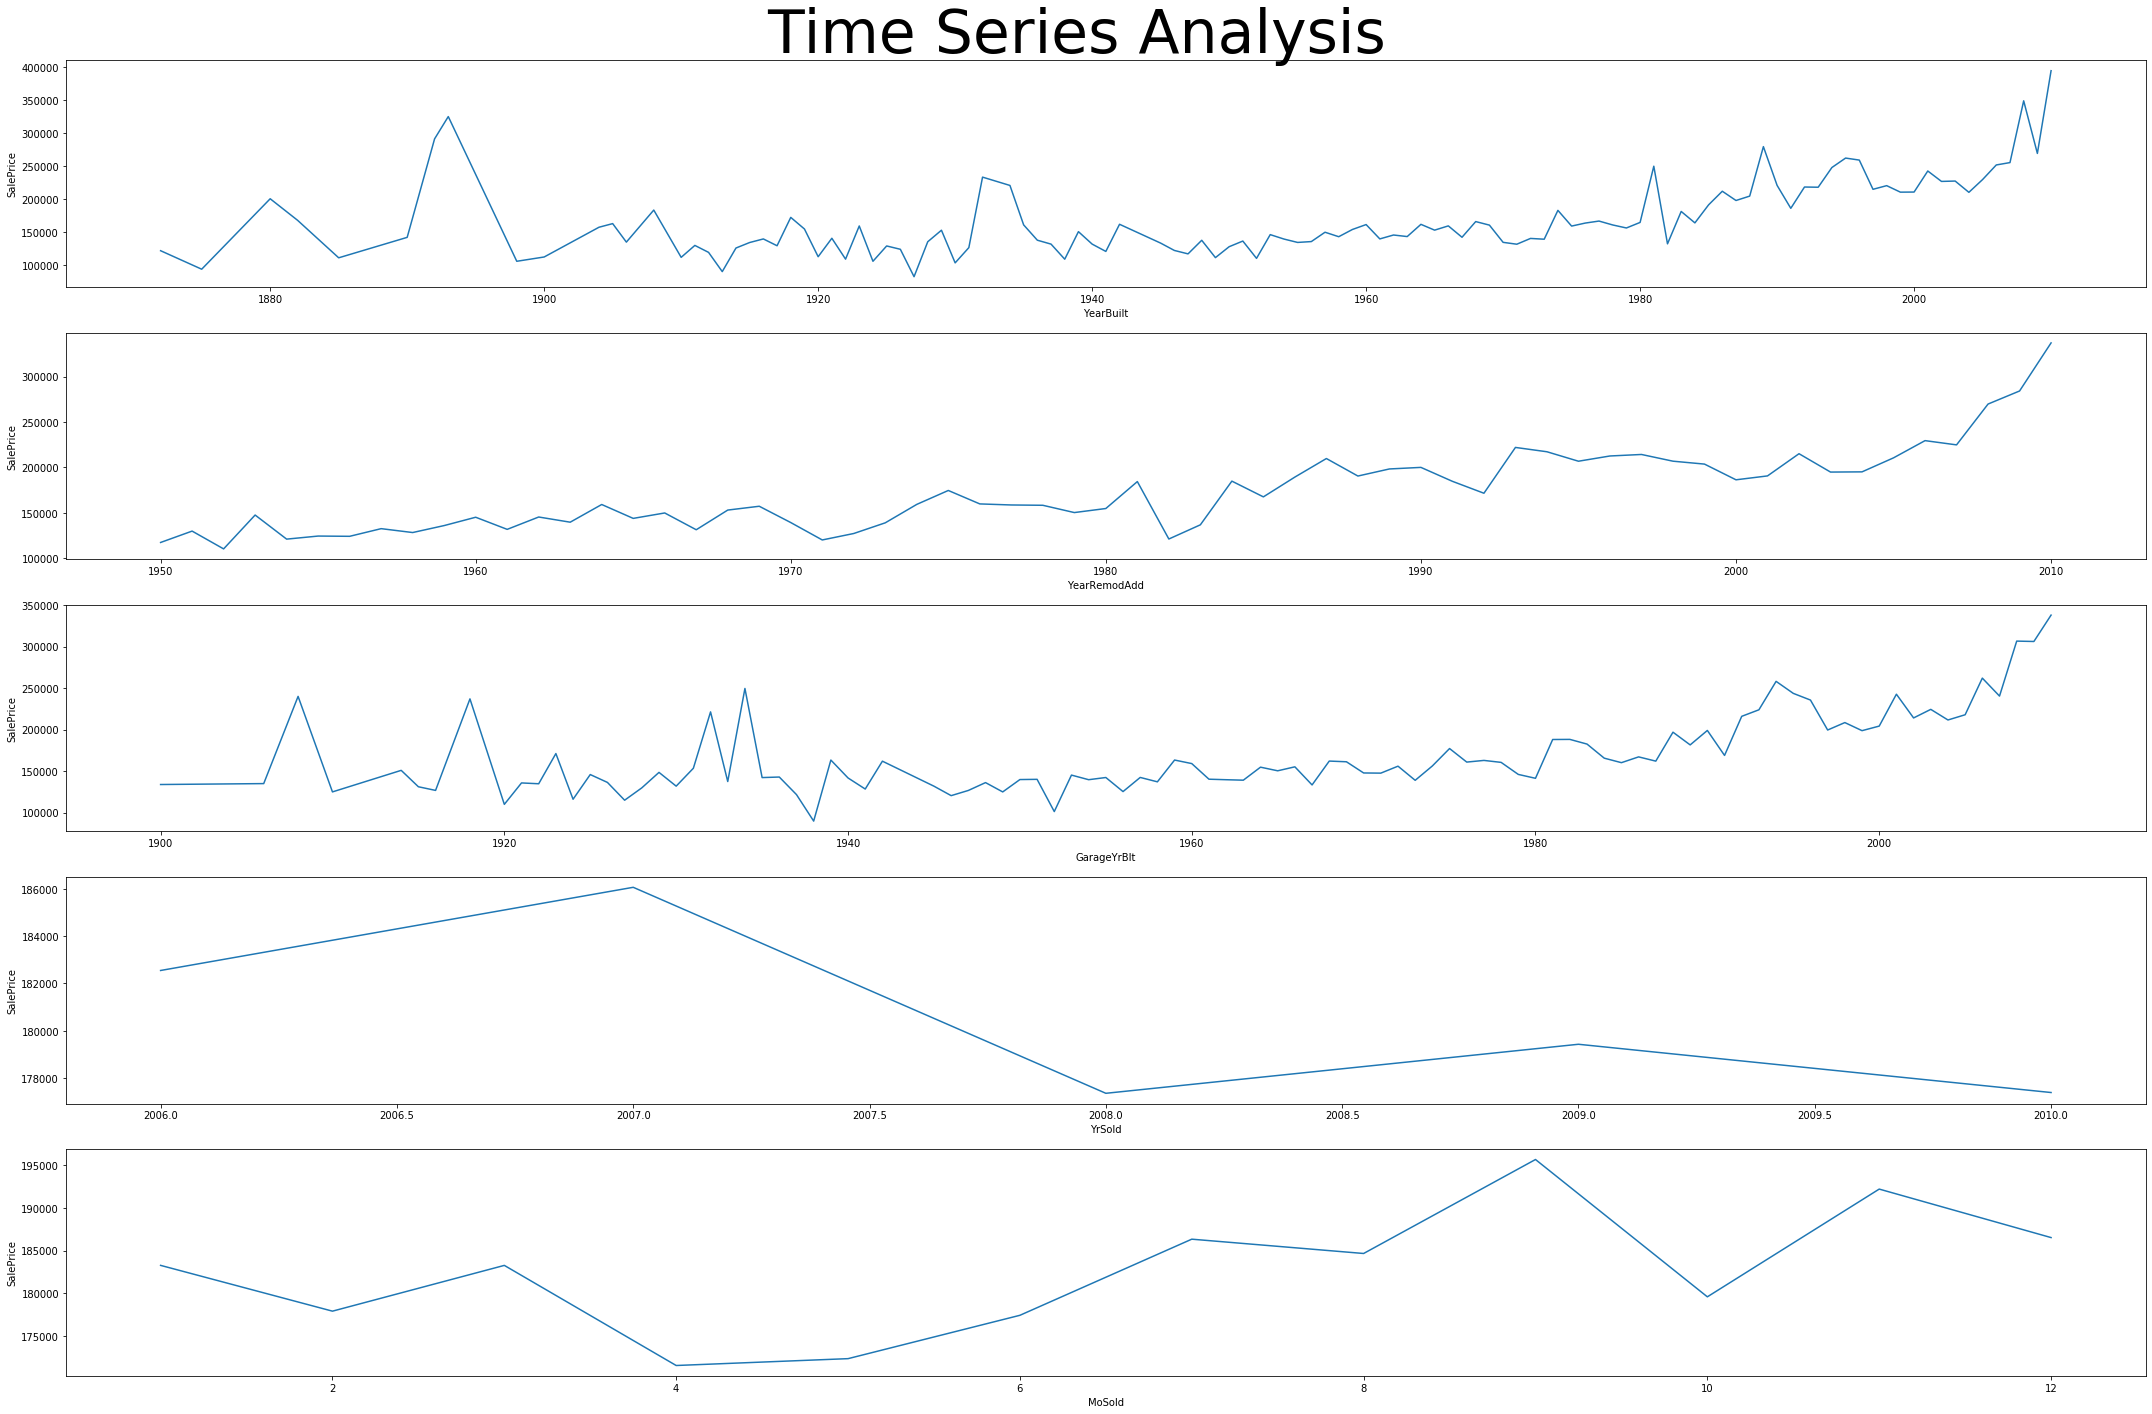

In [25]:
plot_line(train,'SalePrice',time_list,'Time Series Analysis',(30,20))

## Outlier Removal

**Extreme values from the "GrLivArea" column are dropped.**

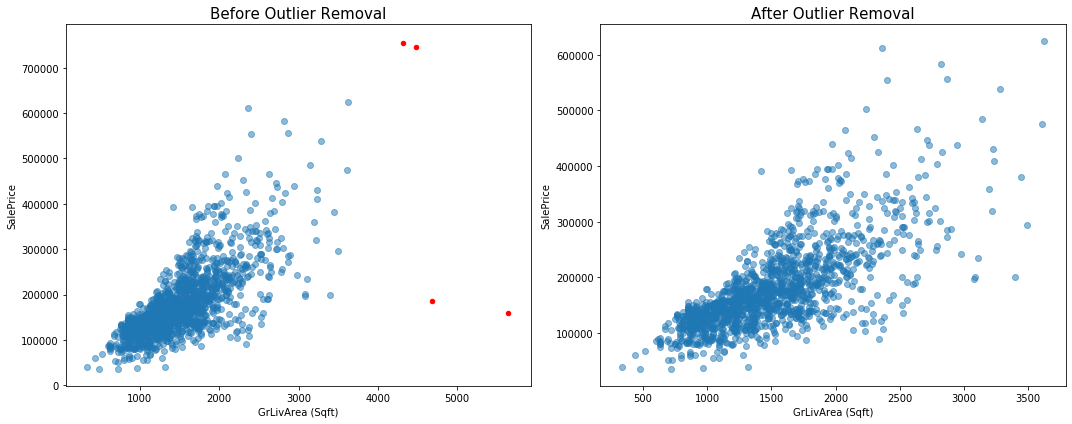

In [26]:
fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

outlier_df = train[(train.GrLivArea > 4000)]
no_outlier_df = train[(train.GrLivArea <= 4000)]

axs[0].scatter(x = 'GrLivArea',y = 'SalePrice', alpha = 0.5, data = no_outlier_df)
axs[0].scatter(x = 'GrLivArea', y = 'SalePrice',c = 'red', s = 20, data = outlier_df)
axs[0].set_xlabel('GrLivArea (Sqft)')
axs[0].set_ylabel('SalePrice')
axs[0].set_title('Before Outlier Removal', fontsize = 15)

axs[1].scatter(x = 'GrLivArea', y = 'SalePrice', alpha = 0.5, data = no_outlier_df)
axs[1].set_xlabel('GrLivArea (Sqft)')
axs[1].set_ylabel('SalePrice')
axs[1].set_title('After Outlier Removal', fontsize = 15)

fig.tight_layout()

In [27]:
indices_to_drop = outlier_df.index
train.drop(index = indices_to_drop, axis = 0, inplace = True)

## Imputing Null Values

**A function that returns a dataframe outlining the number and percent of null values for each column that has null values in the train and test dataset is introduced.**
* _**The function is used to visualize the number of null values in the train and test dataset.**_

In [28]:
def calculate_null(train_data,test_data) :
    null_num_train = train_data.isnull().sum()
    null_percent_train = (null_num_train / len(train_data)) * 100
    null_num_test = test_data.isnull().sum()
    null_percent_test = (null_num_test / len(test_data)) * 100
    
    null_data = pd.DataFrame(data = {'null_num_train': null_num_train,
                                     'null_num_test' : null_num_test,
                                     'null_percent_train' : null_percent_train,
                                     'null_percent_test' : null_percent_test},
                             index = train_data.columns)
    
    null_data = null_data[(null_data['null_num_train'] != 0) & (null_data['null_num_test'] != 0)]
    return null_data.sort_values(by = 'null_num_train',ascending = False) 
    

In [29]:
null_df = calculate_null(train,test)
null_df

,null_num_train,null_num_test,null_percent_train,null_percent_test
PoolQC,1451,1456.0,99.656593,99.794380
MiscFeature,1402,1408.0,96.291209,96.504455
Alley,1365,1352.0,93.750000,92.666210
Fence,1176,1169.0,80.769231,80.123372
FireplaceQu,690,730.0,47.390110,50.034270
LotFrontage,259,227.0,17.788462,15.558602
GarageType,81,76.0,5.563187,5.209047
GarageYrBlt,81,78.0,5.563187,5.346127
GarageFinish,81,78.0,5.563187,5.346127
GarageQual,81,78.0,5.563187,5.346127


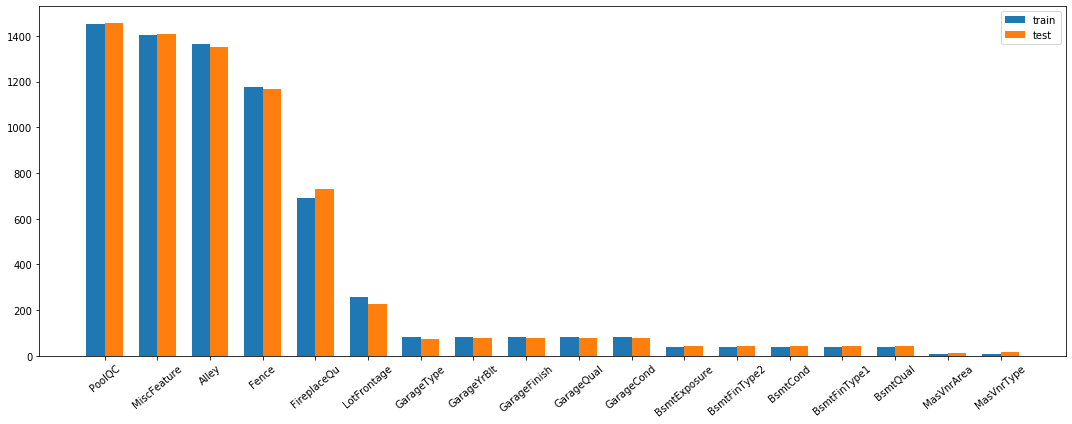

In [30]:
w = 0.35
x = np.arange(0,len(null_df))

fig, ax = plt.subplots(figsize = (15,6))

ax.bar(x - w/2,height = null_df['null_num_train'],width = w,label = 'train')
ax.bar(x + w/2,height = null_df['null_num_test'],width = w,label = 'test')
ax.set_xticks(x)
ax.set_xticklabels(null_df.index,rotation = 40)                     
                                                                    
ax.legend()
fig.tight_layout()

**Missing values from the train and test sets are imputed with values from the train set in order to prevent data leakage.**  
**The methods to impute null values are explained below:**
* _**Column "PoolQC" - The missing values where column "PoolArea" has a value of 0 on the same row are replaced with "NA" or "No Pool." The remaining missing values are replaced with the most frequent value of the column, noninclusive of "NA."**_
* _**Column "MiscFeature" - The missing values where column "Miscval" has a value of 0 on the same row are replaced with "NA" or "None." The remaining missing values are replaced with the most frequent value of the column, noninclusive of "NA."**_
* _**Column "FireplaceQu" - The missing values where column "Fireplaces" has a value of 0 on the same row are replaced with "NA" or "No Fireplace."**_
* _**Column "GarageCond" - The missing values where column "GarageArea" has a value of 0 on the same row are replaced with "NA" or "No Garage."**_
* _**Column "GarageFinish" - The missing values where column "GarageArea" has a value of 0 on the same row are replaced with "NA" or "No Garage."**_
* _**Column "GarageQual" - The missing values where column "GarageArea" has a value of 0 on the same row are replaced with "NA" or "No Garage."**_
* _**Column "GarageType" - The missing values where column "GarageArea" has a value of 0 on the same row are replaced with "NA" or "No Garage."**_
* _**Column GarageYrBlt - The missing values where column "GarageArea" has a value of 0 on the same row are replaced with the value 0. The remaing null values are replaced with the most frequent value of the column.**_
* _**Column "BsmtExposure" - The missing values where column "TotalBsmtSF" has a value of 0 on the same row are replaced with "NA" or "No Basement."**_
* _**Column "BsmtCond" - The missing values where column "TotalBsmtSF" has a value of 0 on the same row are replaced with "NA" or "No Basement."**_
* _**Column "BsmtQual" - The missing values where column "TotalBsmtSF" has a value of 0 on the same row are replaced with "NA" or "No Basement."**_
* _**Column "BsmtExposure" - The missing values where column "TotalBsmtSF" has a value of 0 on the same row are replaced with "NA" or "No Basement."**_
* _**Column "BsmtFinType2" - The missing values where column "TotalBsmtSF" has a value of 0 on the same row are replaced with "NA" or "No Basement."**_
* _**Column "BsmtFinType1" - The missing values where column "TotalBsmtSF" has a value of 0 on the same row are replaced with "NA" or "No Basement."**_
* _**Column "Alley" - The missing values are replaced with "NA" or "No alley access."**_
* _**Column "Fence" - The missing values are replaced with "NA" or "No Fence."**_
* _**Column "LotFrontage" - Lot frontage values are grouped by unique values from columns "LotConfig" and "LotShape." The lot frontage median value for each group are used to replace the null values.**_
* _**The remaining null values are imputed by the median or mode of the column.**_

In [31]:
train.loc[train.PoolArea == 0, 'PoolQC'] = train.loc[train.PoolArea == 0, 'PoolQC'].fillna('NA')
test.loc[test.PoolArea == 0, 'PoolQC'] = test.loc[test.PoolArea == 0, 'PoolQC'].fillna('NA')

In [32]:
test.PoolQC.fillna('Gd',inplace = True)

In [33]:
train.loc[train.MiscVal == 0, 'MiscFeature'] = train.loc[train.MiscVal == 0, 'MiscFeature'].fillna('NA')
test.loc[test.MiscVal == 0, 'MiscFeature'] = test.loc[test.MiscVal == 0, 'MiscFeature'].fillna('NA')

In [34]:
test.MiscFeature.fillna('Shed',inplace = True)

In [35]:
train.loc[train.Fireplaces == 0,'FireplaceQu'] = train.loc[train.Fireplaces == 0,'FireplaceQu'].fillna('NA')
test.loc[test.Fireplaces == 0,'FireplaceQu'] = test.loc[test.Fireplaces == 0,'FireplaceQu'].fillna('NA')

In [36]:
train.loc[train.GarageArea == 0, ['GarageCond','GarageFinish','GarageQual','GarageType']] =\
train.loc[train.GarageArea == 0, ['GarageCond','GarageFinish','GarageQual','GarageType']].fillna('NA')

test.loc[test.GarageArea == 0, ['GarageCond','GarageFinish','GarageQual','GarageType']] =\
test.loc[test.GarageArea == 0, ['GarageCond','GarageFinish','GarageQual','GarageType']].fillna('NA')


In [37]:
train.loc[train.GarageArea == 0, 'GarageYrBlt'] = train.loc[train.GarageArea == 0, 'GarageYrBlt'].fillna(0)
test.loc[test.GarageArea == 0, 'GarageYrBlt'] = test.loc[test.GarageArea == 0, 'GarageYrBlt'].fillna(0)

In [38]:
test.GarageYrBlt.fillna(2005.0,inplace = True)

In [39]:
train.loc[train.TotalBsmtSF==0,['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']] =\
train.loc[train.TotalBsmtSF==0,['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']].fillna('NA')

test.loc[test.TotalBsmtSF==0,['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']] =\
test.loc[test.TotalBsmtSF==0,['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']].fillna('NA')


In [40]:
train.Alley.fillna('NA',inplace = True)
test.Alley.fillna('NA',inplace = True)

In [41]:
train.Fence.fillna('NA',inplace= True)
test.Fence.fillna('NA',inplace= True)

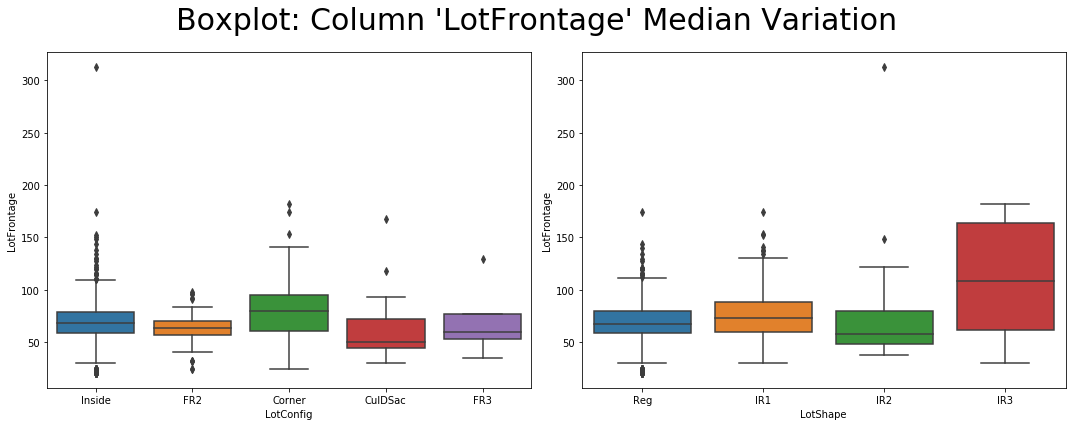

In [42]:
rows = 1
cols = 2
index = 0
feature_list = ['LotConfig', 'LotShape']
fig,axs = plt.subplots(nrows = rows, ncols = cols, figsize =(15,6))
    
for i in range(cols) :
    
    sns.boxplot(x = feature_list[index] , y = 'LotFrontage', data = train, ax = axs[i])
    index += 1    

fig.suptitle("Boxplot: Column 'LotFrontage' Median Variation",fontsize = 30)
fig.tight_layout(rect = [0,0,1,0.90])
              

In [43]:
test.LotFrontage.fillna(train.groupby(['LotConfig','LotShape'])['LotFrontage'].transform('median'),inplace=True)
train.LotFrontage.fillna(train.groupby(['LotConfig','LotShape'])['LotFrontage'].transform('median'),inplace=True)

### Imputing remaining missing values - Since there are less than two percent missing values for each column, I will be imputing by median/mode of that category

In [44]:
def impute_null (train_data,data_to_impute, threshold) :
    null_percent = (data_to_impute.isnull().sum() / len(data_to_impute)) * 100
    null_percent = null_percent[null_percent != 0]
    for ind in null_percent.index :
        if null_percent[ind] < threshold :
            if data_to_impute[ind].dtype != 'float' :
                print('{} missing value(s) for column-{} was replaced by the mode.'.format(
                    data_to_impute[ind].isnull().sum(),ind))
                data_to_impute[ind].fillna(train_data[ind].mode()[0], inplace = True)
            else :
                print('{} missing value(s) for col-{} was replaced by the median.'.format(
                    data_to_impute[ind].isnull().sum(),ind))
                data_to_impute[ind].fillna(train_data[ind].median(),inplace = True)
        else :
            pass
    

In [45]:
impute_null(train,test,2.0)

4 missing value(s) for column-MSZoning was replaced by the mode.
2 missing value(s) for column-Utilities was replaced by the mode.
1 missing value(s) for column-Exterior1st was replaced by the mode.
1 missing value(s) for column-Exterior2nd was replaced by the mode.
16 missing value(s) for column-MasVnrType was replaced by the mode.
15 missing value(s) for col-MasVnrArea was replaced by the median.
3 missing value(s) for column-BsmtQual was replaced by the mode.
4 missing value(s) for column-BsmtCond was replaced by the mode.
3 missing value(s) for column-BsmtExposure was replaced by the mode.
1 missing value(s) for column-BsmtFinType1 was replaced by the mode.
1 missing value(s) for col-BsmtFinSF1 was replaced by the median.
1 missing value(s) for column-BsmtFinType2 was replaced by the mode.
1 missing value(s) for col-BsmtFinSF2 was replaced by the median.
1 missing value(s) for col-BsmtUnfSF was replaced by the median.
1 missing value(s) for col-TotalBsmtSF was replaced by the media

In [46]:
impute_null(train,train,2.0)

1 missing value(s) for col-LotFrontage was replaced by the median.
8 missing value(s) for column-MasVnrType was replaced by the mode.
8 missing value(s) for col-MasVnrArea was replaced by the median.
1 missing value(s) for column-BsmtExposure was replaced by the mode.
1 missing value(s) for column-BsmtFinType2 was replaced by the mode.
1 missing value(s) for column-Electrical was replaced by the mode.


## Feature Transformation

**The values in the target column "SalePrice" are logged.**
* _**Log transformation helps with right-skewed distributions.**_

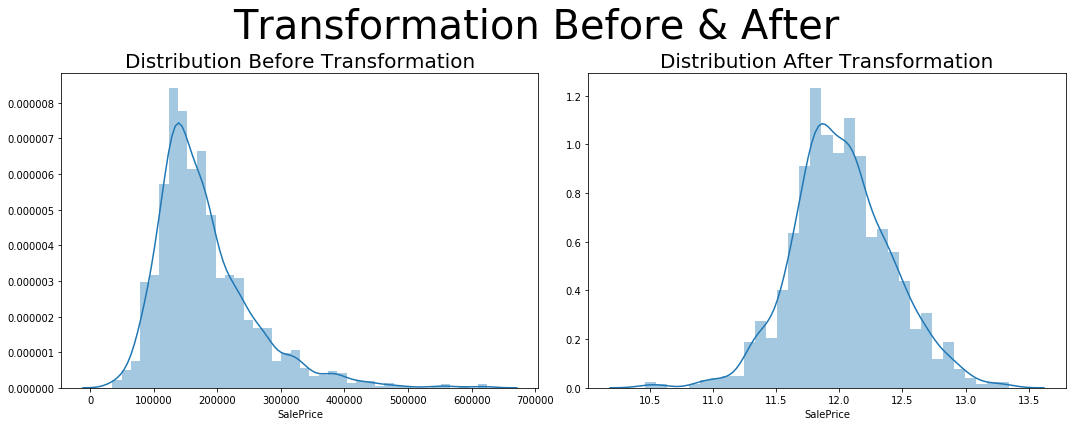

In [47]:
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,6))

sns.distplot(train.SalePrice, ax = ax[0])
ax[0].set_title('Distribution Before Transformation', fontsize = 20)

sns.distplot(np.log(train.SalePrice), ax = ax[1])
ax[1].set_title('Distribution After Transformation', fontsize = 20)

fig.suptitle('Transformation Before & After',fontsize = 40)
fig.tight_layout(rect = [0,0,1,0.9])

In [48]:
original_mat = CLT_matrix(train['SalePrice'],'SalePrice Before Transformation')
transformed_mat = CLT_matrix(np.log(train['SalePrice']),'SalePrice After Transformation')
original_mat.merge(transformed_mat,left_index = True,right_index = True)

,SalePrice Before Transformation,SalePrice After Transformation
skew,1.565959,0.065449
kurtosis,3.885283,0.666438
mean,180151.233516,12.021943
median,163000.000000,12.001505


In [49]:
train['SalePrice'] = np.log(train['SalePrice'])

**Box Cox transformation is applied to the following columns:**
* _**LotFrontage**_
* _**LotArea**_
* _**BsmtUnfSF**_
* _**TotalBsmtSF**_
* _**1stFlrSF**_
* _**GrLivArea**_  
  
**Note: The best value to transform the train dataset is obtained and applied to both the train and test dataset. This is to prevent data leakage.**

In [50]:
def best_transformation(data, col) :
    copy_df = data.copy()
    series = copy_df.loc[:,col]
    trans_data = stats.boxcox(series+1)
    
    
    fig, (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2, figsize = (15,6))
    
    
    plt.suptitle('Transformation of column: {}'.format(col), fontsize = 15, fontweight = 'bold')
    
    sns.distplot(series, ax = ax1)
    sns.distplot(trans_data[0], ax = ax2)
    
    ax1.set_xlabel('Before Transformation', fontsize = 12)
    ax2.set_xlabel('After Transformation', fontsize = 12)
    
    plt.show()
    
    print('Best power value: {:.2f}'.format(trans_data[1]))
    
    #CLT is reference to central limit theorem
    CLT_before_list = [stats.skew(series),stats.kurtosis(series),np.mean(series),np.median(series)]
    CLT_after_list = [stats.skew(trans_data[0]),stats.kurtosis(trans_data[0]),np.mean(trans_data[0]),np.median(trans_data[0])]
    CLT_before_series = pd.Series(CLT_before_list, index = ['Skew','Kurtosis','Mean','Median'])
    CLT_after_series = pd.Series(CLT_after_list, index = ['Skew','Kurtosis','Mean','Median'])
    

    merged_data = pd.concat([CLT_before_series,CLT_after_series],axis = 1)
    merged_data.rename(columns = {0:'Before Transformation', 1 : 'After Transformation'},inplace = True)
    
    return merged_data

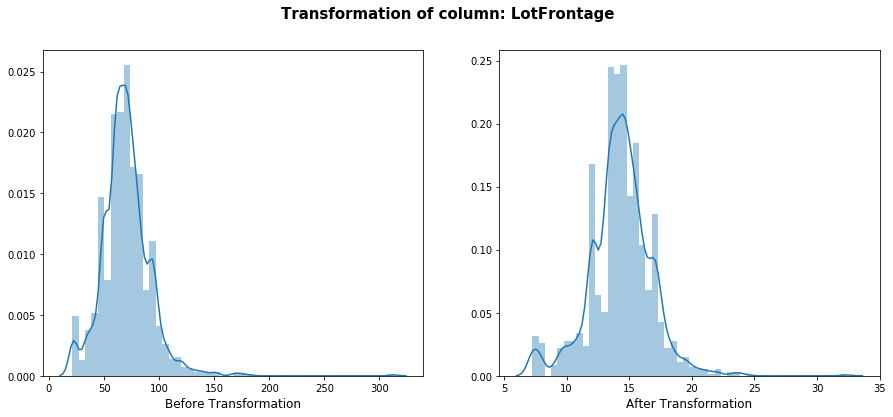

Best power value: 0.49


,Before Transformation,After Transformation
Skew,1.518362,0.125770
Kurtosis,11.990918,3.071592
Mean,69.945055,14.318750
Median,70.000000,14.518713


In [51]:
best_transformation(train,'LotFrontage')

In [52]:
train['LotFrontage'],fitted_lambda = stats.boxcox(train['LotFrontage'] + 1)
test['LotFrontage'] = stats.boxcox(test['LotFrontage'] + 1,fitted_lambda)

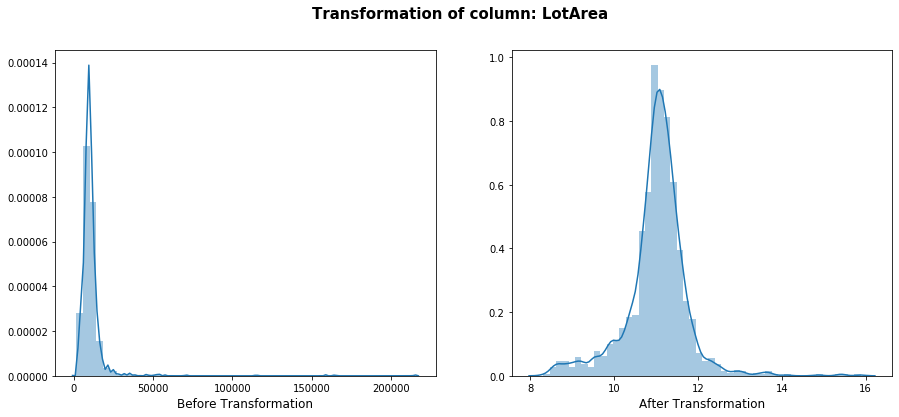

Best power value: 0.04


,Before Transformation,After Transformation
Skew,12.574590,0.035582
Kurtosis,213.070242,5.342691
Mean,10448.784341,11.007577
Median,9468.500000,11.069538


In [53]:
best_transformation(train,'LotArea')

In [54]:
train['LotArea'],fitted_lambda = stats.boxcox(train['LotArea'] + 1)
test['LotArea'] = stats.boxcox(test['LotArea'] + 1,fitted_lambda)

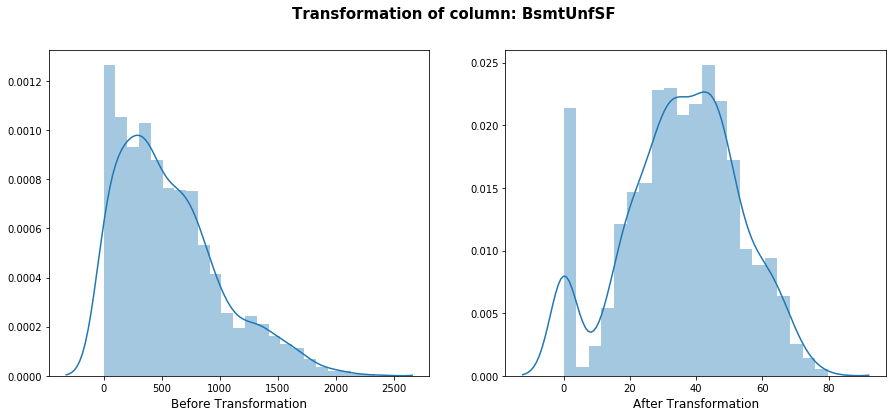

Best power value: 0.47


,Before Transformation,After Transformation
Skew,0.920809,-0.274822
Kurtosis,0.469677,-0.295623
Mean,566.990385,35.762539
Median,477.500000,36.653839


In [55]:
best_transformation(train,'BsmtUnfSF')

In [56]:
train['BsmtUnfSF'],fitted_lambda = stats.boxcox(train['BsmtUnfSF'] + 1)
test['BsmtUnfSF'] = stats.boxcox(test['BsmtUnfSF'] + 1,fitted_lambda)

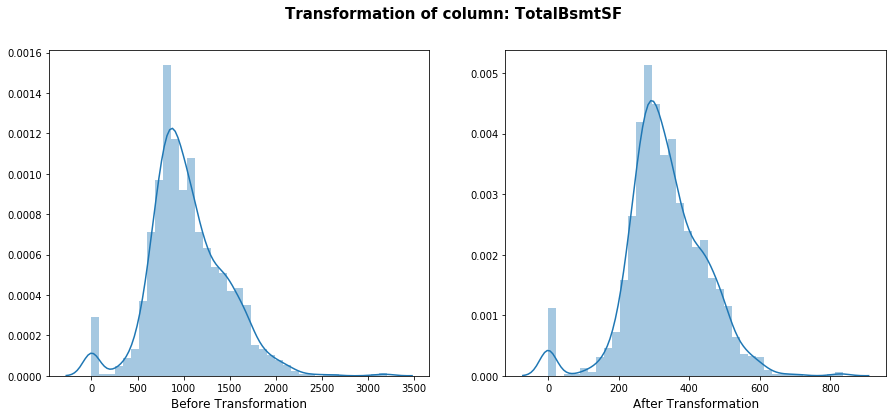

Best power value: 0.81


,Before Transformation,After Transformation
Skew,0.485894,-0.038601
Kurtosis,1.740331,1.770801
Mean,1050.658654,334.676526
Median,990.500000,323.651546


In [57]:
best_transformation(train,'TotalBsmtSF')

In [58]:
train['TotalBsmtSF'],fitted_lambda = stats.boxcox(train['TotalBsmtSF'] + 1)
test['TotalBsmtSF'] = stats.boxcox(test['TotalBsmtSF'] + 1,fitted_lambda)

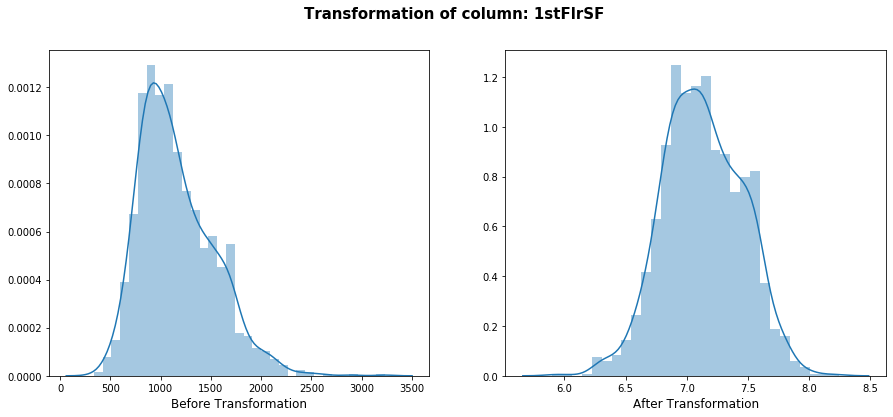

Best power value: 0.01


,Before Transformation,After Transformation
Skew,0.866187,-0.000063
Kurtosis,1.062709,-0.119938
Mean,1157.108516,7.131112
Median,1086.000000,7.115850


In [59]:
best_transformation(train,'1stFlrSF')

In [60]:
train['1stFlrSF'],fitted_lambda = stats.boxcox(train['1stFlrSF'] + 1)
test['1stFlrSF'] = stats.boxcox(test['1stFlrSF'] + 1,fitted_lambda)

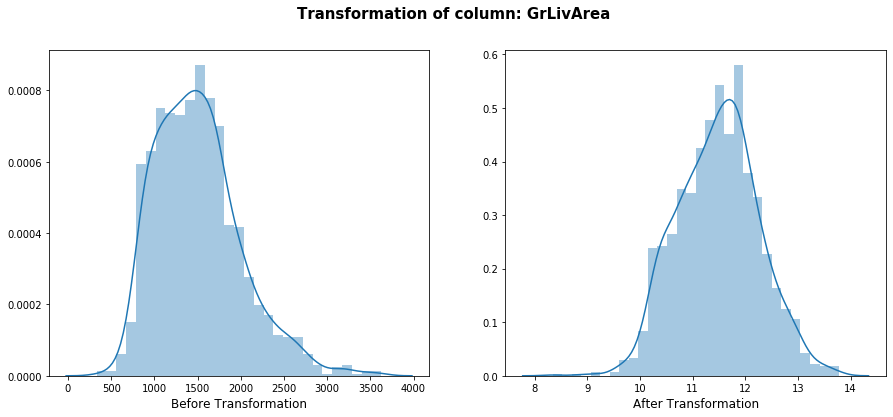

Best power value: 0.12


,Before Transformation,After Transformation
Skew,0.834332,-0.000751
Kurtosis,0.978905,-0.065782
Mean,1506.502060,11.479943
Median,1458.500000,11.513627


In [61]:
best_transformation(train,'GrLivArea')

In [62]:
train['GrLivArea'],fitted_lambda = stats.boxcox(train['GrLivArea'] + 1)
test['GrLivArea'] = stats.boxcox(test['GrLivArea'] + 1,fitted_lambda)

## Fixing Data Type, Creating New Features, and Encoding

**First, the train and test dataframes are merged into one dataframe.**

In [63]:
df = pd.concat([train,test])

**The data type for column "MSSubClass" is changed to data type "object."**

In [64]:
def fix_dtype(data,col_list,data_type) :
    for col in col_list :
        data[col] = data[col].astype(data_type)

In [65]:
to_obj_list = ['MSSubClass']

fix_dtype(df,to_obj_list,'object')

**New features that may help with sale price prediction are created.**  
**These features are then added to the variable type lists.**

In [66]:
df['YrSoldYrRemod'] = df['YrSold'] - df['YearRemodAdd']

df['TotBath'] = df['BsmtFullBath'] + 0.5*df['BsmtHalfBath'] + df['FullBath'] + 0.5*df['HalfBath']

df['TotalPorch'] = df['WoodDeckSF']+df['OpenPorchSF']+\
df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']

df['hasMasVnr'] = np.where(df['MasVnrArea'] > 0, 1, 0)

df['hasBsmtFin1'] = np.where(df['BsmtFinSF1'] > 0, 1, 0)

df['hasBsmtFin2'] = np.where(df['BsmtFinSF2'] > 0, 1, 0)

df['has2ndFlr'] = np.where(df['2ndFlrSF'] > 0, 1, 0)

df['hasLowQualFin'] = np.where(df['LowQualFinSF'] > 0, 1, 0)

df['hasPool'] = np.where(df['PoolArea'] > 0, 1, 0)

df['hasMisc'] = np.where(df['MiscVal'] > 0, 1, 0)

In [67]:
disc_num_list.append('YrSoldYrRemod')
cont_num_list.append('TotBath')
cont_num_list.append('TotalPorch')

**Values from ordinal columns are encoded to numbers, perserving their order.**  
**New columns are generated for nomial and time-related values.**

In [68]:
encoder1 = OrdinalEncoder(categories = [['Po','Fa','TA','Gd','Ex']], dtype = 'int64')
df['ExterQual'] = encoder1.fit_transform(df['ExterQual'].to_frame())

df['ExterCond'] = encoder1.fit_transform(df['ExterCond'].to_frame())

df['HeatingQC'] = encoder1.fit_transform(df['HeatingQC'].to_frame())

df['KitchenQual'] = encoder1.fit_transform(df['KitchenQual'].to_frame())

encoder2 = OrdinalEncoder(categories = [['NA','Po','Fa','TA','Gd','Ex']], dtype = 'int64') 
df['BsmtQual'] = encoder2.fit_transform(df['BsmtQual'].to_frame())

df['BsmtCond'] = encoder2.fit_transform(df['BsmtCond'].to_frame())

df['FireplaceQu'] = encoder2.fit_transform(df['FireplaceQu'].to_frame())

df['GarageQual'] = encoder2.fit_transform(df['GarageQual'].to_frame())

df['GarageCond'] = encoder2.fit_transform(df['GarageCond'].to_frame())

encoder3 = OrdinalEncoder(categories = [['NA','No','Mn','Av','Gd']], dtype = 'int64')
df['BsmtExposure'] = encoder3.fit_transform(df['BsmtExposure'].to_frame())

encoder4 = OrdinalEncoder(categories = [['NA','Unf','LwQ','BLQ','Rec','ALQ','GLQ']], dtype = 'int64')
df['BsmtFinType1'] = encoder4.fit_transform(df['BsmtFinType1'].to_frame())

df['BsmtFinType2'] = encoder4.fit_transform(df['BsmtFinType2'].to_frame())

encoder5 = OrdinalEncoder(categories = [['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']], dtype = 'int64')
df['Functional'] = encoder5.fit_transform(df['Functional'].to_frame())

encoder6 = OrdinalEncoder(categories = [['NA','Fa','TA','Gd','Ex']], dtype = 'int64') 
df['PoolQC'] = encoder6.fit_transform(df['PoolQC'].to_frame())

In [69]:
df = pd.get_dummies(df,columns = nomial_list,drop_first = True)

## Model Selection

**The dataframe is split back into one dataframe containing sale price values and another dataset without any sale price values.**  
**From the dataset containing sale price values, the independent columns are assigned to X and the target column is assigned to y.**  
**X and y are then split into train and validation sets.**  
**Various paramters are tested for different algorithms to find the best paramters for each model.**

In [70]:
filled = df[df['SalePrice'].notnull()]
missing = df[df['SalePrice'].isnull()]

filled.shape,missing.shape

((1456, 235), (1459, 235))

In [71]:
X = filled.drop('SalePrice',axis = 1)
y = filled['SalePrice']

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.80,random_state = 7)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1164, 234), (292, 234), (1164,), (292,))

In [73]:
to_normalize_list = cont_num_list + disc_num_list + time_list
preprocesser = ColumnTransformer(transformers = [('robust_scaler',RobustScaler(),to_normalize_list)],
                                 remainder = 'passthrough')

**Lasso Hyperparamter Tuning**

In [74]:
lasso_grid = {'lasso__alpha' : np.linspace(0.1,1)}
lasso_pipe = make_pipeline(preprocesser,Lasso())

La = GridSearchCV(estimator = lasso_pipe,
                  param_grid = lasso_grid,
                  scoring = 'neg_root_mean_squared_error',
                  cv = 3,
                  n_jobs = -1)

La.fit(X_train,y_train)

print('Training done.')

Training done.


**Ridge Hyperparameter Tuning**

In [75]:
ridge_grid = {'ridge__alpha' : np.linspace(0.1,15)}
ridge_pipe = make_pipeline(preprocesser,Ridge())

R = GridSearchCV(estimator = ridge_pipe,
                 param_grid = ridge_grid,
                 scoring = 'neg_root_mean_squared_error',
                 cv = 3,
                 n_jobs = -1)

R.fit(X_train,y_train)

print('Training done.')

Training done.


**Elastic Net Hyperparameter Tuning**

In [76]:
elastic_grid = {'elasticnet__alpha' : np.linspace(0.1,1),
                'elasticnet__l1_ratio' : np.linspace(0.1,1)}
elastic_pipe = make_pipeline(preprocesser,ElasticNet())

E = GridSearchCV(estimator = elastic_pipe,
                 param_grid = elastic_grid,
                 scoring = 'neg_root_mean_squared_error',
                 cv = 3,
                 n_jobs = -1)

E.fit(X_train,y_train)

print('Training done.')

Training done.


**Random Forest Regressor Hyperparameter Tuning**

In [77]:
rf_grid = {'max_depth' : range(2,6),
           'min_samples_split' : range(1,15,2),
           'min_samples_leaf' : [10,20,30],
           'max_features' : np.arange(0.1,1,0.1)}

rfr = GridSearchCV(estimator = RandomForestRegressor(n_estimators = 1000),
                   param_grid = rf_grid,
                   scoring = 'neg_root_mean_squared_error',
                   cv = 3,
                   n_jobs = -1)

rfr.fit(X_train,y_train)

print('Training done.')

Training done.


**Gradient Boosting Regressor Hyperparameter Tuning**

In [78]:
gb_grid = {'learning_rate' : [0.05,0.1,0.2],
           'n_estimators' : [200,300,400,500],
           'min_samples_split' : range(6,14,2),
           'min_samples_leaf' : [20,30,40],
           'max_depth' : range(2,6),
           'max_features' : np.arange(0.1,1,0.1)}

gbr = GridSearchCV(estimator = GradientBoostingRegressor(loss = 'huber'),
                         param_grid = gb_grid,
                         scoring = 'neg_root_mean_squared_error',
                         cv = 3,
                         n_jobs = -1)

gbr.fit(X_train,y_train)

print('Training done.')

Training done.


**Extreme Gradient Boosting Hyperparamter Tuning**

In [79]:
xg_grid = {'learning_rate': [0.05,0.1,0.2],
           'n_estimators' : [500,1000,2000],
           'max_depth' : range(2,6),
           'min_child_weight' : [3,4,5],
           'colsample_bytree' : np.arange(0.1,1,0.1)}

xgr = GridSearchCV(estimator = XGBRegressor(objective = 'reg:squarederror'),
                   param_grid = xg_grid,
                   scoring = 'neg_root_mean_squared_error',
                   cv = 3,
                   n_jobs = -1)

xgr.fit(X_train,y_train)

print('Training done.')

Training done.


In [80]:
La_best = La.best_estimator_
R_best = R.best_estimator_
E_best = E.best_estimator_
rfr_best = rfr.best_estimator_
gbr_best = gbr.best_estimator_
xgr_best = xgr.best_estimator_

**A function to compare the metric score from the train and validation set is introduced.**
* _**Note: Models are overfitting. This can be solved by collecting more data.**_

In [81]:
def find_score(X_train,X_test,y_train,y_test,algorithms,algorithm_names) :
    train_score = []
    test_score = []
    for alg in algorithms :
        alg.fit(X_train,y_train)
        train_score.append(np.sqrt(mean_squared_error(y_train,alg.predict(X_train))))
        test_score.append(np.sqrt(mean_squared_error(y_test,alg.predict(X_test))))
        
    score_df = pd.DataFrame(data = {'train_RMSLE' : train_score,
                                    'test_RMSLE' : test_score},
                           index = algorithm_names)
    return score_df

In [82]:
alg_list = [La,R_best,E,rfr,gbr_best,xgr_best]
alg_name_list = ['Lasso','Ridge','ElasticNet','RandomForestRegressor','GradientBoostingRegressor','XGRegressor']
score_df = find_score(X_train,X_test,y_train,y_test,alg_list,alg_name_list)
score_df

,train_RMSLE,test_RMSLE
Lasso,0.197268,0.229149
Ridge,0.095096,0.120157
ElasticNet,0.128436,0.152287
RandomForestRegressor,0.127512,0.158330
GradientBoostingRegressor,0.081546,0.126684
XGRegressor,0.070592,0.123828


## Simple Stacking

**Stacking can improve predictions.**
* _**Stacking comes from the sense that some models can account for the weakenesses of other models.**_ <br>
  
**The following steps are taken to create a stacking model:**
1. _**Pick the best three models.**_
2. _**Train each model with the train set.**_
3. _**Make predictions for each model.**_
4. _**For each prediction made by the three models, take the average.**_

In [83]:
def plot_score() :
    test_score = score_df['test_RMSLE'].sort_values().round(decimals = 4)
    x = range(len(score_df))
    
    fig,ax = plt.subplots(figsize = (15,6))
    ax.bar(x = x, height = test_score,color = ['b','b','b','r','r','r'])
    ax.set_xticks(x)
    for x_pos,y_pos in zip(x,test_score) :
        ax.text(x = x_pos-0.15,y = y_pos/2, s = y_pos,color = 'w', fontsize = 15)
    ax.set_xticklabels(test_score.index, fontsize = 10,rotation = 40)
    
    fig.suptitle('RMSLE by Model',fontsize = 30)
    fig.tight_layout(rect = [0,0,1,0.90])

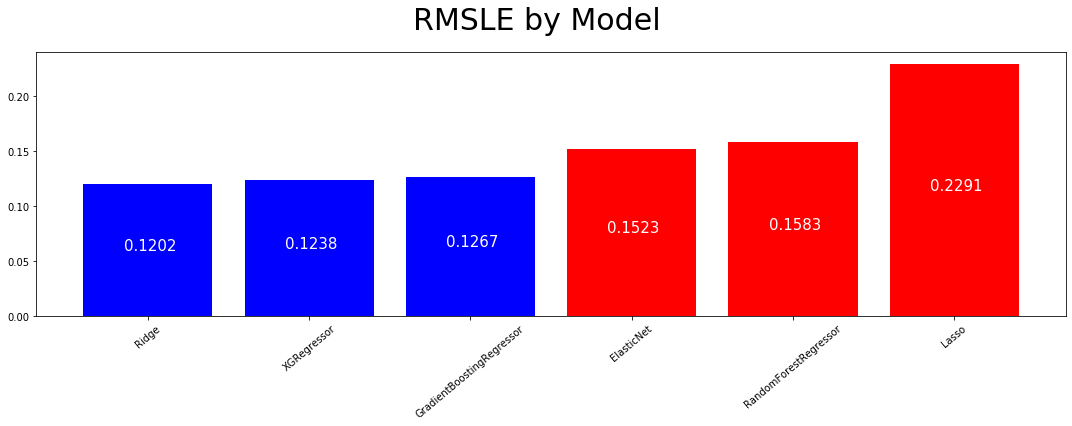

In [84]:
plot_score()

In [85]:
def stack_model(model_list,X_to_train,y_to_train,X_to_predict) :
    pred_list = []
    for mod in model_list :
        mod.fit(X_to_train,y_to_train)
        pred_list.append((mod.predict(X_to_predict)))
    pred_avg = sum(pred_list) / len(model_list)
    
    return pred_avg     

In [86]:
train_pred = stack_model([R_best,xgr_best,gbr_best],X_train,y_train,X_train)
test_pred = stack_model([R_best,xgr_best,gbr_best],X_train,y_train,X_test)
train_score = np.sqrt(mean_squared_error(y_train,train_pred))
test_score = np.sqrt(mean_squared_error(y_test,test_pred))

In [87]:
stacked_df = pd.DataFrame(data = {'train_RMSLE' : train_score,
                  'test_RMSLE' : test_score},
                  index = ['Stacked Model'])

score_df = pd.concat([score_df,stacked_df])
score_df.sort_values(by = 'test_RMSLE', ascending = False, inplace = True)
score_df

,train_RMSLE,test_RMSLE
Lasso,0.197268,0.229149
RandomForestRegressor,0.127512,0.158330
ElasticNet,0.128436,0.152287
GradientBoostingRegressor,0.081546,0.126684
XGRegressor,0.070592,0.123828
Ridge,0.095096,0.120157
Stacked Model,0.078635,0.119394


**A line plot is visualized to compare model performance.**
* _**Note: The simple stacking model provided the best score thus far.**_

In [88]:
def plot_line_score() :
    plt.figure(figsize = (15,8))
    
    plt.plot(score_df.test_RMSLE, marker = '.')
    plt.grid()
    
    plt.xlabel('Model Name', fontsize = 15)
    plt.xticks(rotation = 40)
    plt.ylabel('RMSLE Score', fontsize = 15)
    plt.suptitle('Model RMSLE Comparison', fontsize = 30)
    
    plt.tight_layout(rect = [0,0,1,0.90])

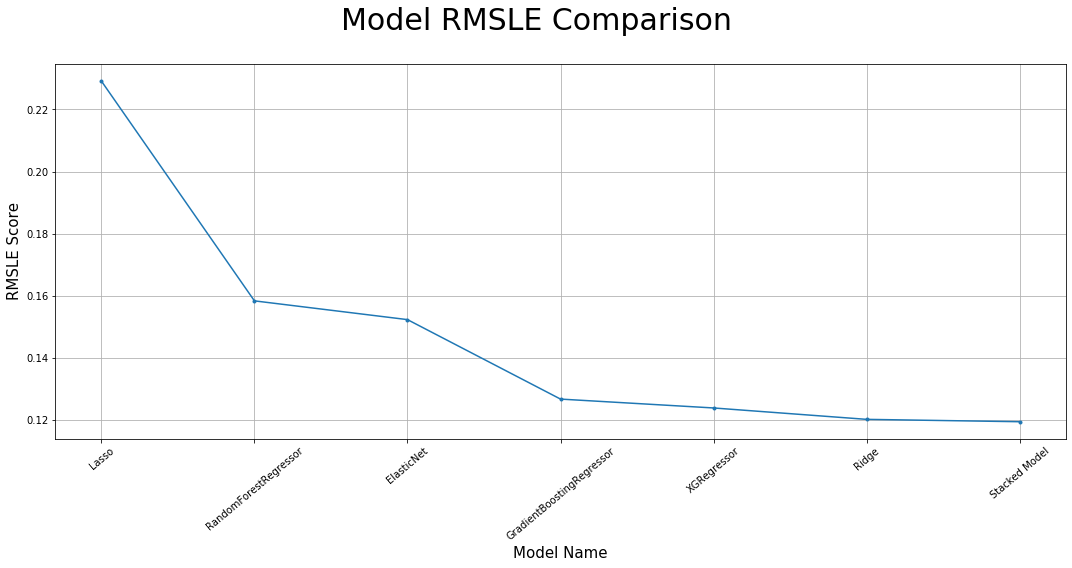

In [89]:
plot_line_score()

## Results

**The stacking model is trained using the entire train dataset, and the independent variables from the test dataset are used to predict sale price.**  
**The results are then saved to a dataframe and exported to a csv file.**

In [90]:
result = np.exp(stack_model([R_best,xgr_best,gbr_best],X,y,missing.drop('SalePrice',axis = 1))).round()

In [91]:
result_df = test_id.merge(pd.Series(result, name = 'SalePrice'),left_index = True,right_index = True)
result_df.set_index('Id',inplace = True)
result_df.head()

,SalePrice
Id,
1461,122847.0
1462,158122.0
1463,183220.0
1464,196452.0
1465,189863.0


In [92]:
result_df.to_csv('House Price Prediction.csv')